In [285]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [286]:
data=pd.read_csv('Automobile_insurance_fraud.csv')

In [287]:
data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [288]:
data.shape

(1000, 40)

The dataset consists of 1000 rows of data and 40 columns describing that data.

In [289]:
data.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

-  Since c39 column is fully filled with null values, I will be dropping that column as it is nof no use.

In [290]:
data.drop(['_c39'],axis=1,inplace=True)

In [291]:
#shape of dataset after dropping column
data.shape

(1000, 39)

In [292]:
data.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

**Checking for duplicates in dataset.**

In [468]:
data.duplicated().sum()

0

# Exploratory Data Analysis

In [293]:
data['months_as_customer'].unique()

array([328, 228, 134, 256, 137, 165,  27, 212, 235, 447,  60, 121, 180,
       473,  70, 140, 160, 196, 460, 217, 370, 413, 237,   8, 257, 202,
       224, 241,  64, 166, 155, 114, 149, 147,  62, 289, 431, 199,  79,
       116,  37, 106, 269, 265, 163, 355, 175, 192, 430,  91, 223, 195,
        22, 439,  94,  11, 151, 154, 245, 119, 215, 295, 254, 107, 478,
       128, 338, 271, 222, 120, 270, 319, 194, 227, 244,  78, 200, 284,
       275, 153,  31,  41, 127,  61, 207, 219,  80, 325,  29, 239, 279,
       350, 464, 118, 298,  87, 261, 453, 210, 168, 390, 258, 225, 164,
       255, 206, 203, 211, 274,  81, 280, 112,  24,  93, 171, 124, 287,
       122, 398, 214, 209,  82, 193, 288, 104, 101, 375, 461, 428,  45,
       136, 216, 278, 108,  14, 276,  47,  73, 294, 324,  53, 426, 111,
        86, 296, 125, 177, 238, 449, 252, 359,  19, 285,  30, 342, 468,
       343, 404,  63, 335, 142, 272,  69,  38, 281, 246, 330, 362, 371,
       377, 172,  99, 249, 190, 174,  95,   2, 117, 242, 440,  2

<AxesSubplot:xlabel='months_as_customer', ylabel='Count'>

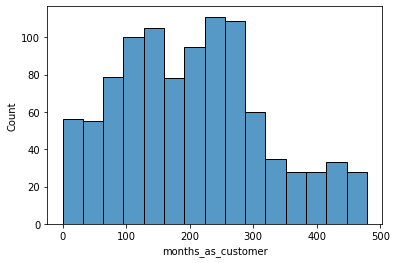

In [294]:
sns.histplot(data['months_as_customer'])

- It can be seen from the plot that most number of customers that have taken insurance range from 100 to 300 months.
- There are some customers who are >450 months old.

In [295]:
data['age'].unique()

array([48, 42, 29, 41, 44, 39, 34, 37, 33, 61, 23, 38, 58, 26, 31, 62, 55,
       40, 35, 43, 45, 25, 30, 28, 49, 54, 47, 59, 27, 56, 32, 36, 64, 60,
       51, 46, 50, 57, 53, 24, 52, 19, 21, 63, 20, 22], dtype=int64)

<AxesSubplot:xlabel='age', ylabel='Count'>

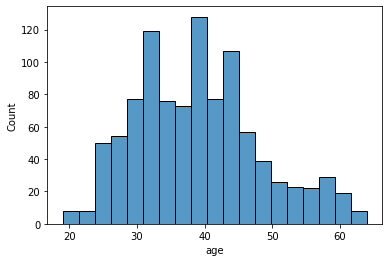

In [296]:
sns.histplot(data['age'])

- The above plot suggests that most people who have taken insurance are in the age group of 40 years old.
- There are approx. 20 people who are in the age group of >60 years old.

In [297]:
data['policy_number'].unique()

array([521585, 342868, 687698, 227811, 367455, 104594, 413978, 429027,
       485665, 636550, 543610, 214618, 842643, 626808, 644081, 892874,
       558938, 275265, 921202, 143972, 183430, 431876, 285496, 115399,
       736882, 699044, 863236, 608513, 914088, 596785, 908616, 666333,
       336614, 584859, 990493, 129872, 200152, 933293, 485664, 982871,
       206213, 616337, 448961, 790442, 108844, 430029, 529112, 939631,
       866931, 582011, 691189, 537546, 394975, 729634, 282195, 420810,
       524836, 307195, 623648, 485372, 598554, 303987, 343161, 519312,
       132902, 332867, 356590, 346002, 500533, 348209, 486676, 260845,
       657045, 761189, 175177, 116700, 166264, 527945, 627540, 279422,
       484200, 645258, 694662, 960680, 498140, 498875, 798177, 614763,
       679370, 958857, 686816, 127754, 918629, 731450, 307447, 992145,
       900628, 235220, 740019, 246882, 797613, 193442, 389238, 760179,
       939905, 872814, 632627, 283414, 163161, 853360, 776860, 149367,
      

In [298]:
data['policy_number'].value_counts()

521585    1
687755    1
674485    1
223404    1
991480    1
         ..
563878    1
620855    1
583169    1
337677    1
556080    1
Name: policy_number, Length: 1000, dtype: int64

- The policy numbers are all unique number for each of their customers, hence this data is not useful for us in model building, hence this column will be dropped.

In [299]:
# dropping policy_number column

data.drop(['policy_number'],axis=1,inplace=True)

In [300]:
data['policy_bind_date'].unique()

array(['17-10-2014', '27-06-2006', '06-09-2000', '25-05-1990',
       '06-06-2014', '12-10-2006', '04-06-2000', '03-02-1990',
       '05-02-1997', '25-07-2011', '26-05-2002', '29-05-1999',
       '20-11-1997', '26-10-2012', '28-12-1998', '19-10-1992',
       '08-06-2005', '15-11-2004', '28-12-2014', '02-08-1992',
       '25-06-2002', '27-11-2005', '27-05-1994', '08-02-1991',
       '02-02-1996', '05-12-2013', '20-09-1990', '18-07-2002',
       '08-02-1990', '04-03-2014', '18-02-2000', '19-06-2008',
       '01-08-2003', '04-04-1992', '13-01-1991', '08-08-2010',
       '09-03-2003', '03-02-1993', '25-11-2002', '27-07-1997',
       '08-05-1995', '30-08-2012', '30-04-2006', '13-04-2003',
       '05-12-2007', '21-08-2006', '08-01-1990', '18-03-1990',
       '07-01-2008', '10-03-1997', '10-01-2004', '20-08-1994',
       '02-06-2002', '28-04-1994', '17-08-2014', '11-08-2007',
       '20-11-2008', '18-10-1995', '19-05-1993', '26-02-2005',
       '14-02-1990', '30-09-1993', '10-06-2014', '28-10

- policy bind date is the date from when car was insured. 
- **According to me, we dont policy bind date column as we already have no. of months data from where policy was issued. hence as per to me it is better to drop this table, hence dropping policy_bind_date column.**

In [301]:
#dropping policy_bind_date column

data.drop(['policy_bind_date'],axis=1,inplace=True)

In [302]:
data['policy_state'].unique()

array(['OH', 'IN', 'IL'], dtype=object)

<AxesSubplot:xlabel='policy_state', ylabel='count'>

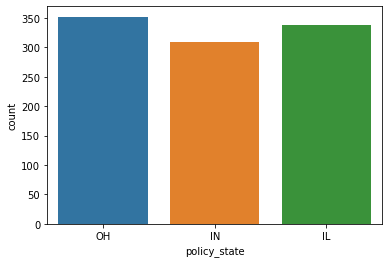

In [303]:
sns.countplot(data['policy_state'])

- As per above plot it can be seen that most number of OH policy state is seen follwed by IL.

In [304]:
data['policy_csl'].unique()

array(['250/500', '100/300', '500/1000'], dtype=object)

<AxesSubplot:xlabel='policy_csl', ylabel='count'>

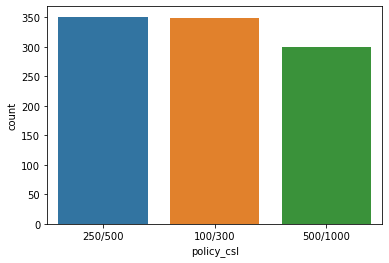

In [305]:
sns.countplot(data['policy_csl'])

- It can be seen that almost equal number of policy holders have taken 250/500 and 100/300 type policies. Less number of people have taken 500/1000 type of policies.

In [306]:
data['policy_deductable'].unique()

array([1000, 2000,  500], dtype=int64)

<AxesSubplot:xlabel='policy_deductable', ylabel='count'>

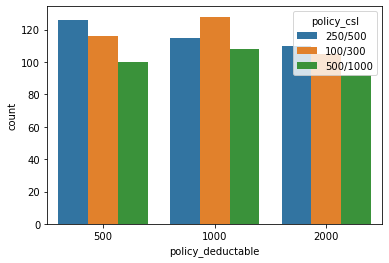

In [307]:
sns.countplot(data['policy_deductable'],hue=data['policy_csl'])

- The above plot shows the persons with different policy csl have to pay different amount of mandatory deductibles during or before an insurance claim.
- It can be seen that most number of people with 100/300 policy csl have to pay 1000 as deductible while persons with 2000 dedectible policy are lowest compared to others.

In [308]:
data['policy_annual_premium'].unique()

array([1406.91, 1197.22, 1413.14, 1415.74, 1583.91, 1351.1 , 1333.35,
       1137.03, 1442.99, 1315.68, 1253.12, 1137.16, 1215.36,  936.61,
       1301.13, 1131.4 , 1199.44,  708.64, 1374.22, 1475.73, 1187.96,
        875.15,  972.18, 1268.79,  883.31, 1266.92, 1322.1 ,  848.07,
       1291.7 , 1104.5 ,  954.16, 1337.28, 1088.34, 1558.29, 1415.68,
       1334.15,  988.45, 1222.48, 1155.55, 1262.08, 1451.62, 1737.66,
       1475.93,  538.17, 1081.08, 1454.43, 1240.47, 1273.7 , 1123.87,
       1245.89, 1326.62, 1073.83, 1530.52, 1201.41, 1393.57, 1276.57,
       1082.49, 1414.74, 1470.06,  870.63,  795.23, 1168.2 ,  993.51,
       1848.81, 1641.73, 1362.87, 1239.22,  835.02, 1061.33, 1279.08,
       1105.49, 1055.53,  895.83, 1632.93, 1405.99, 1425.54, 1038.09,
       1307.11, 1489.24,  976.67, 1340.43, 1267.81, 1234.2 , 1318.06,
        769.95, 1514.72,  873.64, 1612.43, 1318.24, 1226.83, 1326.44,
       1136.83, 1322.78, 1483.25, 1515.3 , 1075.18, 1690.27, 1352.83,
       1148.73,  969

<AxesSubplot:xlabel='policy_annual_premium', ylabel='Count'>

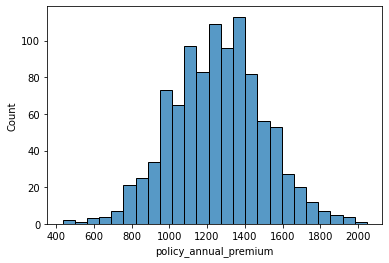

In [309]:
sns.histplot(data['policy_annual_premium'])

- It can be seen from the plot that very high number of people i.e. >110 pays policy premium in the range of 1300-1400 dollars.
- Very few people pay premium of 2000 dollars.

In [310]:
data['umbrella_limit'].unique()

array([       0,  5000000,  6000000,  4000000,  3000000,  8000000,
        7000000,  9000000, 10000000, -1000000,  2000000], dtype=int64)

In [311]:
data['umbrella_limit'].value_counts()

 0           798
 6000000      57
 5000000      46
 4000000      39
 7000000      29
 3000000      12
 8000000       8
 9000000       5
 2000000       3
 10000000      2
-1000000       1
Name: umbrella_limit, dtype: int64

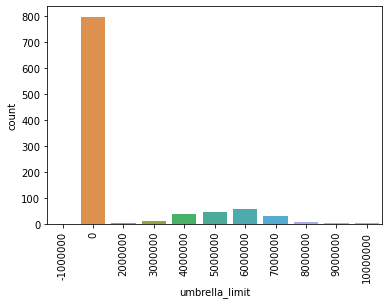

In [312]:
sns.countplot(data['umbrella_limit'])
plt.xticks(rotation='vertical')
plt.show()

- Most number of people does not have umbrella limit for their car, while very less number of people have taken umbrella limit insurance.

In [313]:
data['insured_zip'].unique()

array([466132, 468176, 430632, 608117, 610706, 478456, 441716, 603195,
       601734, 600983, 462283, 615561, 432220, 464652, 476685, 458733,
       619884, 470610, 472135, 477670, 618845, 442479, 443920, 453148,
       434733, 613982, 436984, 607730, 609837, 432211, 473328, 610393,
       614780, 472248, 603381, 479224, 430141, 620757, 615901, 474615,
       456446, 470577, 441648, 433782, 468104, 459407, 472573, 433473,
       446326, 435481, 477310, 609930, 603993, 437818, 478423, 467784,
       606714, 464691, 431683, 431725, 609216, 452787, 468767, 435489,
       450149, 458364, 476458, 602433, 478575, 449718, 463181, 441992,
       452597, 614417, 472895, 475847, 476978, 600648, 608335, 471600,
       441175, 603123, 457767, 618498, 605486, 617970, 432934, 456762,
       601748, 607763, 436973, 471300, 453277, 465100, 603248, 601112,
       438830, 464959, 439787, 464839, 448984, 440327, 460742, 446895,
       609374, 451672, 604450, 432896, 618929, 451312, 605141, 459504,
      

- These are zip codes wherein the insurance company settles claims. This data is not related to model as the data we required i.e. about the places where incidents happened is already provided to us  as incident state and incident city. Hence this column is of use, Hence it will dropped.

In [314]:
#dropping insured_zip column

data.drop(['insured_zip'],axis=1,inplace=True)

<AxesSubplot:xlabel='insured_sex', ylabel='count'>

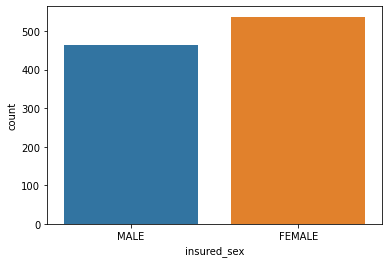

In [315]:
sns.countplot(data['insured_sex'])

- Most number of females are insured for auto then males.

In [316]:
data['insured_education_level'].unique()

array(['MD', 'PhD', 'Associate', 'Masters', 'High School', 'College',
       'JD'], dtype=object)

<AxesSubplot:xlabel='insured_education_level', ylabel='count'>

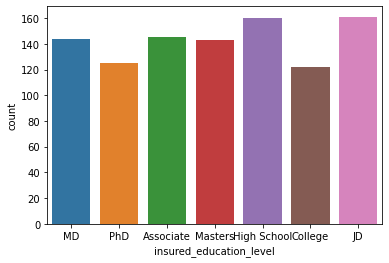

In [317]:
sns.countplot(data['insured_education_level'])

- The above plot shows the education level of people who have purchased insurance;Almost equal number of people have studied till High School and JD.

In [318]:
data['insured_occupation'].unique()

array(['craft-repair', 'machine-op-inspct', 'sales', 'armed-forces',
       'tech-support', 'prof-specialty', 'other-service',
       'priv-house-serv', 'exec-managerial', 'protective-serv',
       'transport-moving', 'handlers-cleaners', 'adm-clerical',
       'farming-fishing'], dtype=object)

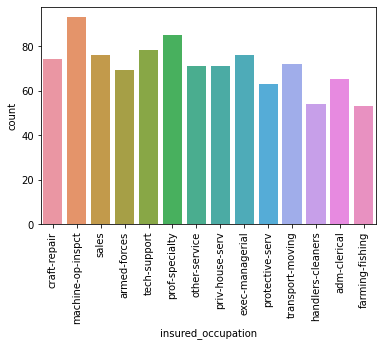

In [319]:
sns.countplot(data['insured_occupation'])
plt.xticks(rotation=90)
plt.show()

- The above plot shows the number of pwople who have purchased insurance with respevt to their occupation.

In [320]:
data['insured_hobbies'].unique()

array(['sleeping', 'reading', 'board-games', 'bungie-jumping',
       'base-jumping', 'golf', 'camping', 'dancing', 'skydiving',
       'movies', 'hiking', 'yachting', 'paintball', 'chess', 'kayaking',
       'polo', 'basketball', 'video-games', 'cross-fit', 'exercise'],
      dtype=object)

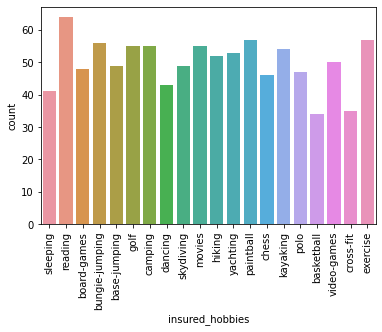

In [321]:
sns.countplot(data['insured_hobbies'])
plt.xticks(rotation=90)
plt.show()

- The above plot shows the list of hobbies of insurance owners.


In [322]:
data['insured_relationship'].unique()

array(['husband', 'other-relative', 'own-child', 'unmarried', 'wife',
       'not-in-family'], dtype=object)

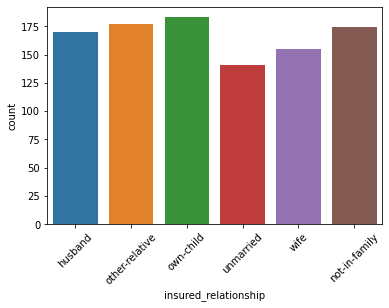

In [323]:
sns.countplot(data['insured_relationship'])
plt.xticks(rotation=45)
plt.show()

- The above plot shows the insured relationship of insured person with. There are 6 categories seen as mentioned in plot.

<AxesSubplot:xlabel='capital-gains', ylabel='Count'>

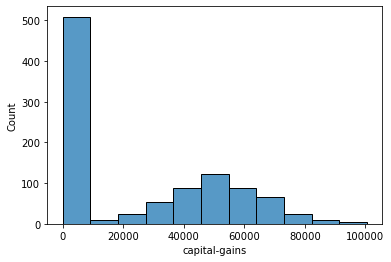

In [324]:
sns.histplot(data['capital-gains'])

- The capital gains are max. in the range of 0-10000, very high compared to other gains.

<AxesSubplot:xlabel='capital-loss', ylabel='Count'>

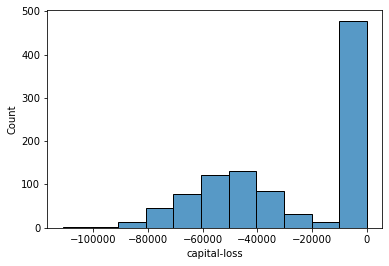

In [325]:
sns.histplot(data['capital-loss'])

- As seen in plot, capital losses are within range of 0 to -10000.

In [326]:
data['incident_date'].unique()

array(['25-01-2015', '21-01-2015', '22-02-2015', '10-01-2015',
       '17-02-2015', '02-01-2015', '13-01-2015', '27-02-2015',
       '30-01-2015', '05-01-2015', '06-01-2015', '15-02-2015',
       '22-01-2015', '08-01-2015', '15-01-2015', '29-01-2015',
       '19-01-2015', '01-01-2015', '10-02-2015', '11-01-2015',
       '24-02-2015', '09-01-2015', '28-01-2015', '07-01-2015',
       '18-01-2015', '28-02-2015', '12-02-2015', '24-01-2015',
       '03-01-2015', '16-01-2015', '14-02-2015', '21-02-2015',
       '18-02-2015', '26-02-2015', '17-01-2015', '27-01-2015',
       '11-02-2015', '12-01-2015', '06-02-2015', '20-01-2015',
       '02-02-2015', '20-02-2015', '08-02-2015', '23-02-2015',
       '01-03-2015', '14-01-2015', '19-02-2015', '09-02-2015',
       '26-01-2015', '23-01-2015', '31-01-2015', '03-02-2015',
       '01-02-2015', '05-02-2015', '25-02-2015', '16-02-2015',
       '13-02-2015', '04-02-2015', '07-02-2015', '04-01-2015'],
      dtype=object)

- This data shows the dates when insurance was purchased.

In [327]:
data['incident_type'].unique()

array(['Single Vehicle Collision', 'Vehicle Theft',
       'Multi-vehicle Collision', 'Parked Car'], dtype=object)

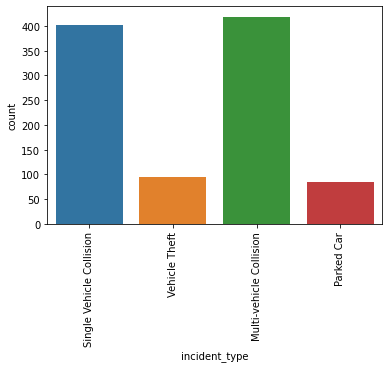

In [328]:
sns.countplot(data['incident_type'])
plt.xticks(rotation=90)
plt.show()

- The above plot shows the type of incidents that insurance company covered.
- Most kind of incidents that were reported are of single and multi vehicle collision.

In [329]:
data['collision_type'].unique()

array(['Side Collision', '?', 'Rear Collision', 'Front Collision'],
      dtype=object)

- In above output one type is identified as '?'.
- Since that column is type of categorical type, hence replacing it with mode value of same column.

In [330]:
data['collision_type']=data['collision_type'].replace({'?':data['collision_type'].mode()[0]})

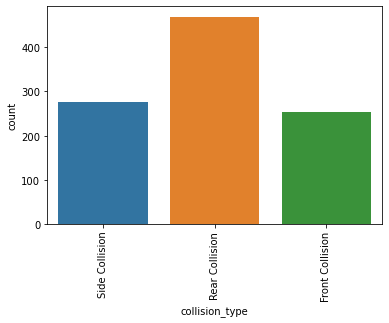

In [331]:
sns.countplot(data['collision_type'])
plt.xticks(rotation=90)
plt.show()

- It can be seen from the plot that the '?' data has been replaced with mode of the columm which is 'rear collision' and it is now seen that rear collisions are the most type of collision seen in cars that are insured.


In [332]:
data['incident_severity'].unique()

array(['Major Damage', 'Minor Damage', 'Total Loss', 'Trivial Damage'],
      dtype=object)

<AxesSubplot:xlabel='incident_severity', ylabel='count'>

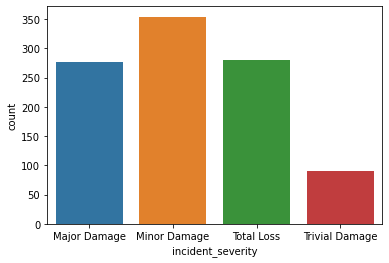

In [333]:
sns.countplot(data['incident_severity'])

-  Most of the accidents reports had minor damages. Almost equal number of cars were either undegone major damage or went into total loss.

In [334]:
data['authorities_contacted'].unique()

array(['Police', 'None', 'Fire', 'Other', 'Ambulance'], dtype=object)

<AxesSubplot:xlabel='authorities_contacted', ylabel='count'>

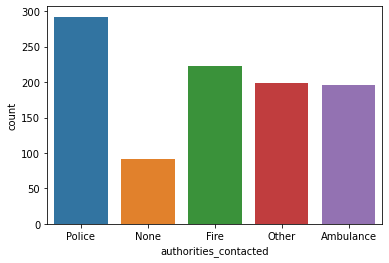

In [335]:
sns.countplot(data['authorities_contacted'])

- The above plot shows the plot wherein number of incidents that were reported to authorities. Most people contacted Police after incident happend.

In [336]:
data['incident_state'].unique()

array(['SC', 'VA', 'NY', 'OH', 'WV', 'NC', 'PA'], dtype=object)

<AxesSubplot:xlabel='incident_state', ylabel='count'>

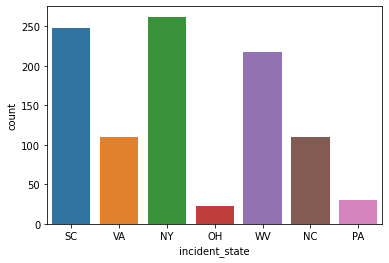

In [337]:
sns.countplot(data['incident_state'])

- The above plot suggests that most of the incidents happened in NY state while very less in OH.

In [338]:
data['incident_city'].unique()

array(['Columbus', 'Riverwood', 'Arlington', 'Springfield', 'Hillsdale',
       'Northbend', 'Northbrook'], dtype=object)

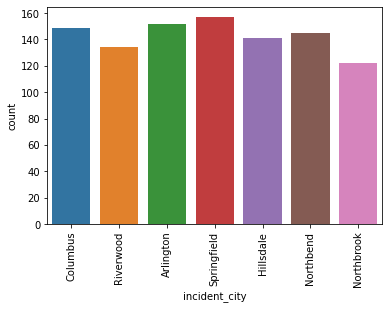

In [339]:
sns.countplot(data['incident_city'])
plt.xticks(rotation=90)
plt.show()

- The above plot suggest that citywise most incidents happened in Springfield ahile least reported in Northbrook.

In [340]:
data['incident_location'].value_counts()

9935 4th Drive         1
4214 MLK Ridge         1
8548 Cherokee Ridge    1
2352 MLK Drive         1
9734 2nd Ridge         1
                      ..
6770 1st St            1
4119 Texas St          1
4347 2nd Ridge         1
1091 1st Drive         1
1416 Cherokee Ridge    1
Name: incident_location, Length: 1000, dtype: int64

- This data consits of location/places where accident/incident happened to cars.
- All this data consists of single location and this locations are not repeated. Since this locations are unique there is no point in keeping this column as it has no use in model building. If the places were repeated then we can analyse the place and contact that place authorities to minimize incidents happenening at that place.
- **Hence dropping incident_location column**

In [341]:
# Dropping incident location column

data.drop(['incident_location'],axis=1,inplace=True)

In [342]:
data.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,OH,250/500,1000,1406.91,0,MALE,MD,craft-repair,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,IN,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,OH,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,IL,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,IL,500/1000,1000,1583.91,6000000,MALE,Associate,sales,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


<AxesSubplot:xlabel='incident_hour_of_the_day', ylabel='count'>

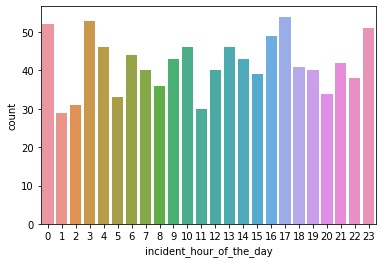

In [343]:
sns.countplot(data['incident_hour_of_the_day'])

- As per above plot it can be seen that most of the accidents happened at evening time and after midnight.

In [344]:
data['number_of_vehicles_involved'].unique()

array([1, 3, 4, 2], dtype=int64)

<AxesSubplot:xlabel='number_of_vehicles_involved', ylabel='count'>

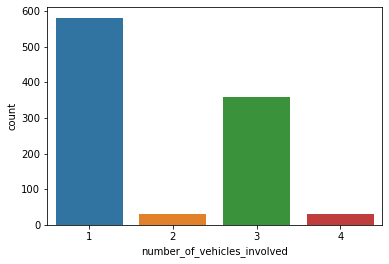

In [345]:
sns.countplot(data['number_of_vehicles_involved'])

- The above plot suggest that in most cases only 1 car was involved. Over 300 cases reported which had three car collisions.

In [346]:
data['property_damage'].unique()

array(['YES', '?', 'NO'], dtype=object)

- It can be seen that this column has a third type mentioned as '?'. Hence we need tp replace it with mode value of the same column.

In [347]:
# replacing "?" with nan values

data['property_damage']=data['property_damage'].replace({'?':np.nan})

In [348]:
data['property_damage'].value_counts()

NO     338
YES    302
Name: property_damage, dtype: int64

In [349]:
# Filling nan values with mode of same column

data['property_damage']=data['property_damage'].fillna(data['property_damage'].mode()[0])

In [350]:
data['property_damage'].unique()

array(['YES', 'NO'], dtype=object)

<AxesSubplot:xlabel='property_damage', ylabel='count'>

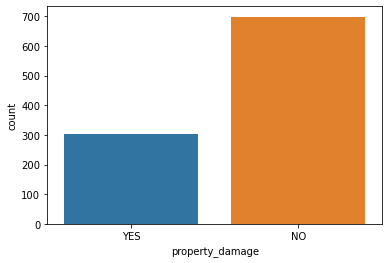

In [351]:
sns.countplot(data['property_damage'])

- It can be seen from the plot that there has less number of property damage incidents seen during insurance claims.

In [352]:
data['bodily_injuries'].unique()

array([1, 0, 2], dtype=int64)

<AxesSubplot:xlabel='bodily_injuries', ylabel='count'>

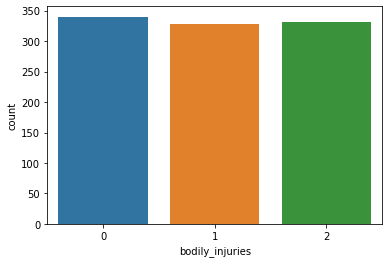

In [353]:
sns.countplot(data['bodily_injuries'])

- It can be seen from the plot that almost all kinds of bodily injuries is seen.

In [354]:
data['witnesses'].unique()

array([2, 0, 3, 1], dtype=int64)

<AxesSubplot:xlabel='witnesses', ylabel='count'>

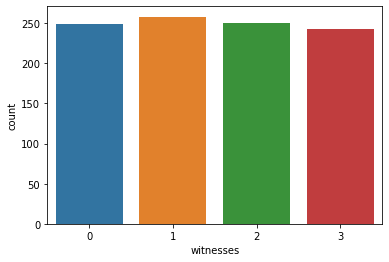

In [355]:
sns.countplot(data['witnesses'])

- It can be seen that the number represents how many witnesses were present at the time of accident/collision happened.

In [412]:
data['police_report_available'].unique()

array(['YES', nan, 'NO'], dtype=object)

- It can be seen from the plot there is '?' marked data, which was not filled as they might have been not sire if police report was available or not. This data cannot be used in model building, Hence converting this data into nan( null values) and then inputing mode value of that data as it is categorical.


In [413]:
# replacing '?' data points with nan values

data['police_report_available']=data['police_report_available'].replace({'?':np.nan})

In [414]:
data['police_report_available'].unique()

array(['YES', nan, 'NO'], dtype=object)

In [418]:
#filling nan values with mode value of same column

data['police_report_available']=data['police_report_available'].fillna(data['police_report_available'].mode()[0])

In [419]:
data['police_report_available'].unique()

array(['YES', 'NO'], dtype=object)

<AxesSubplot:xlabel='police_report_available', ylabel='count'>

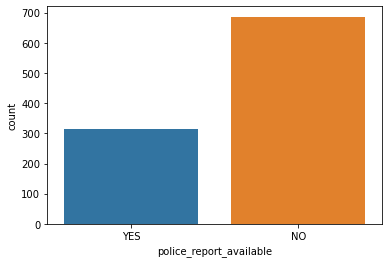

In [420]:
sns.countplot(data['police_report_available'])

- It can be seen from the plot above that in most cases police report is not available.

In [361]:
data['total_claim_amount'].unique()

array([ 71610,   5070,  34650,  63400,   6500,  64100,  78650,  51590,
        27700,  42300,  87010, 114920,  56520,   7280,  46200,  63120,
        52110,  77880,  72930,  60400,  47160,  37840,  71520,  98160,
        71500,   9020,   5720,  69840,  91650,  75600,  67140,  29790,
        77110,  64800,  53100,  60200,   5330,  62300,  60170,  40000,
        97080,  51660,  51120,  56400,  55120,  62800,   7290,  76600,
        81800,   7260,   4300,  70510,   2640,  78900,  56430,   2400,
        65790,  62920,  69480,  44280,  56300,  68520,  59130,  82320,
        89700,  33930,  68530,  68310,  61290,  30100,  57120,  42930,
        51210,  89400,  59730,   8060,  72200,  50800,   6600,   7500,
         6490,  60940,  58300,  68400,  64240,   4700,  45120,  66950,
        98340,   5900,  70680,  93720,   6930,  64890,   5400,   5600,
        79300,  52800,  28800,   2970,  93480,   4320,  79800,  74200,
        70590,  74700,  70000,  81070,  57720,   7080,  47700,  51260,
      

<AxesSubplot:xlabel='total_claim_amount', ylabel='Count'>

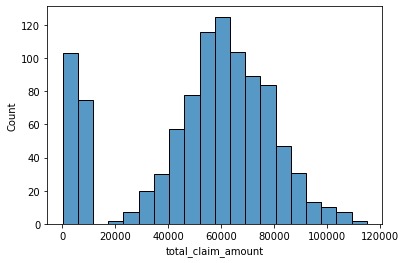

In [362]:
sns.histplot(data['total_claim_amount'])

- It can be seen from the plot that highest value of claim settlement crosses 100000 USD mark for very low amount of people.
- Highest claim amount are in range of 60000 USD.

In [363]:
data['injury_claim'].unique()

array([ 6510,   780,  7700,  6340,  1300,  6410, 21450,  9380,  2770,
        4700,  7910, 17680,  4710,  1120,  4200, 10520,  5790, 14160,
        6630,  6040,     0, 17880,  8180,  7080, 16500,  1640,  1040,
        7760, 14100, 12600,  7460,  3310, 14020, 10800, 10620,  6020,
        1230, 12460, 10940,  8000, 16180,  5740,  5680, 11280,  6890,
        6280,   810, 15320, 16360,  1320,   430, 12820,   480, 15780,
         300,  7310, 11440, 15440,  7380,  5630, 11420,  6570, 13720,
       13800,   860, 12420,  6810,  3010,  9520,  9540, 11380, 14900,
       10860,  1240, 14440, 10160,   660,   750,  1180,  5540,  5830,
       11400, 11680,   940, 10300,  8940,   590,  5890, 17040,  1260,
        7210,   900,   700, 15860, 10560,   330, 15580,  6650,  7420,
        7470, 14000, 14740, 14430,  4770,  9320,  6400, 18000, 13240,
       13860, 12760,  8570,  7000,  3300,  5760, 10640,  4970, 14120,
        6150,  8500,  4680, 17360, 13840,   410,  6550, 12260,  9460,
         470,  1890,

<AxesSubplot:xlabel='injury_claim', ylabel='Count'>

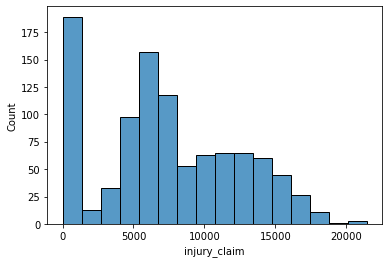

In [364]:
sns.histplot(data['injury_claim'])

- The above plot shows the injury claim amount for different individuals, highest seen is >20000 USD.

In [365]:
data['property_claim'].unique()

array([13020,   780,  3850,  6340,   650,  6410,  7150,  9380,  2770,
        4700, 15820, 17680,  9420,  1120,  8400, 10520,  5790,  7080,
       13260,  6040,  5240,  4730,  5960, 16360, 14160, 11000,   820,
         520, 15520, 14100, 12600,  7460,  3310, 14020,  5400,  5310,
        6020,  6230, 10940,  4000, 16180,  5740,  5680, 11280,     0,
        6280,   810,  7660,  8180,   660,   430, 12820,   480,  7890,
        6270,   300,  7310,  5720,  3690, 11260,  5710,  6570,  6860,
       13800,  3770,   860,  6210,  6810,  4760,  4770,  5690,  7450,
       10860,  1240,  7220, 10160,  1320,  1500,  1180, 11080, 11660,
       11400, 11680,   470,  5640, 10300, 17880,   590, 11780,  8520,
         630,  6630,  7210,   900,   700, 15860,  5280,  3600,   330,
        7790, 19950, 14840, 14940,  7000, 14740,  9620,  9540,  9320,
       12800,  9000,  6620, 13860, 12760,  6160, 17140,  9900,  5760,
       10640,  4970, 14120, 12300,  8500,  9360,  8680,  6920,   410,
        6550, 12260,

<AxesSubplot:xlabel='property_claim', ylabel='Count'>

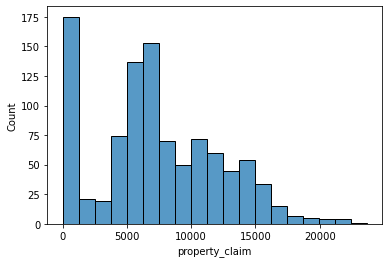

In [366]:
sns.histplot(data['property_claim'])

- The above plot shows the property claim amount for different individuals, highest seen is >20000 USD.
- Well for most individuals property claim amount was minimal.

In [367]:
data['vehicle_claim'].unique()

array([52080,  3510, 23100, 50720,  4550, 51280, 50050, 32830, 22160,
       32900, 63280, 79560, 42390,  5040, 33600, 42080, 40530, 56640,
       53040, 48320, 41920, 33110, 47680, 73620, 44000,  6560,  4160,
       46560, 63450, 50400, 52220, 23170, 49070, 48600, 37170, 48160,
        3280, 43610, 38290, 28000, 64720, 40180, 39760, 33840, 48230,
       63090, 50240,  5670, 53620, 57260,  5280,  3440, 44870,  1680,
       55230, 50160,  1800, 51170, 45760, 54040, 33210, 39410, 51390,
       45990, 61740, 62100, 30160, 49840,  2580, 49680, 47670, 27090,
       42840, 28620, 34140, 67050, 38010,  5580, 50540, 30480,  4620,
        5250,  4130, 44320, 40810, 45600, 40880,  3290, 39480, 46350,
       71520,  4720, 53010, 68160, 59670, 50470,  3600,  4200, 47580,
       36960, 25200,  2310, 70110,  3360, 53200, 51940, 48870, 52290,
       49000, 51590, 33670, 33390, 32620, 51200, 63000, 52960, 41580,
       51040, 49280, 51420, 28800,  2970, 42560, 34790, 56480, 43050,
       34000, 32760,

<AxesSubplot:xlabel='vehicle_claim', ylabel='Count'>

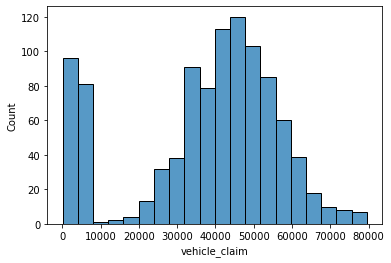

In [368]:
sns.histplot(data['vehicle_claim'])

The above plot shows the vehicle claim amount for different individuals, highest seen is 700000-80000 USD, the average being in range of 35000-45000.

In [369]:
data['auto_make'].unique()

array(['Saab', 'Mercedes', 'Dodge', 'Chevrolet', 'Accura', 'Nissan',
       'Audi', 'Toyota', 'Ford', 'Suburu', 'BMW', 'Jeep', 'Honda',
       'Volkswagen'], dtype=object)

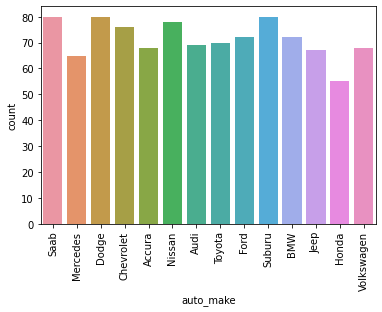

In [370]:
sns.countplot(data['auto_make'])
plt.xticks(rotation=90)
plt.show()

- The cars that met with highest number of accidents are Saab, Dodge, Nissan and Subaru.

In [371]:
data['auto_model'].unique()

array(['92x', 'E400', 'RAM', 'Tahoe', 'RSX', '95', 'Pathfinder', 'A5',
       'Camry', 'F150', 'A3', 'Highlander', 'Neon', 'MDX', 'Maxima',
       'Legacy', 'TL', 'Impreza', 'Forrestor', 'Escape', 'Corolla',
       '3 Series', 'C300', 'Wrangler', 'M5', 'X5', 'Civic', 'Passat',
       'Silverado', 'CRV', '93', 'Accord', 'X6', 'Malibu', 'Fusion',
       'Jetta', 'ML350', 'Ultima', 'Grand Cherokee'], dtype=object)

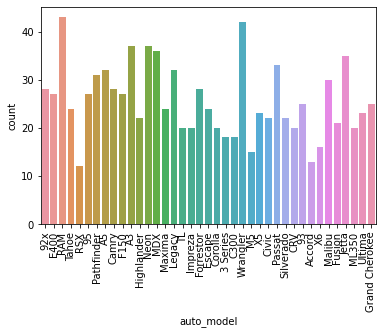

In [372]:
sns.countplot(data['auto_model'])
plt.xticks(rotation=90)
plt.show()

- The car model that met with highet number of collisions is RAM followed by Wrangler.

In [373]:
data['auto_year'].unique()

array([2004, 2007, 2014, 2009, 2003, 2012, 2015, 1996, 2002, 2006, 2000,
       2010, 1999, 2011, 2005, 2008, 1995, 2001, 1998, 1997, 2013],
      dtype=int64)

**Instead of using year of vehicle purchased/manufactured data, I'm converting it into age of car at time of accident/collision. SInce this data is from 2015, subtracting 2015 with auto year will get age of car.**
 

In [446]:
# calculation age of car

data['car_age']=2015-(data['auto_year'])

In [448]:
# printing dataset
data.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,car_age
0,328,48,OH,250/500,1000,1406.91,0,MALE,MD,craft-repair,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,11
1,228,42,IN,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,...,NO,5070,780,780,3510,Mercedes,E400,2007,Y,8
2,134,29,OH,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,8
3,256,41,IL,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,1
4,228,44,IL,500/1000,1000,1583.91,6000000,MALE,Associate,sales,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,6


In [449]:
# Dropping auto_year column as it is not required now

data.drop(['auto_year'],axis=1,inplace=True)

In [450]:
data.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported,car_age
0,328,48,OH,250/500,1000,1406.91,0,MALE,MD,craft-repair,...,2,YES,71610,6510,13020,52080,Saab,92x,Y,11
1,228,42,IN,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,...,0,NO,5070,780,780,3510,Mercedes,E400,Y,8
2,134,29,OH,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,...,3,NO,34650,7700,3850,23100,Dodge,RAM,N,8
3,256,41,IL,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,Y,1
4,228,44,IL,500/1000,1000,1583.91,6000000,MALE,Associate,sales,...,1,NO,6500,1300,650,4550,Accura,RSX,N,6


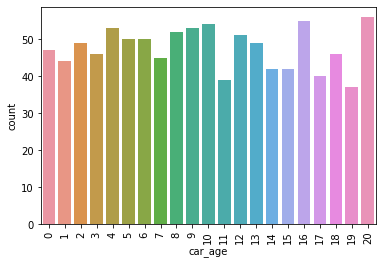

In [451]:
sns.countplot(data['car_age'])
plt.xticks(rotation=90)
plt.show()

- These are the years when cars were purchased/manufactured. The oldest vehicle with insurance claim is 20 years old and newest is 0 years old.

In [375]:
data['fraud_reported'].unique()

array(['Y', 'N'], dtype=object)

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

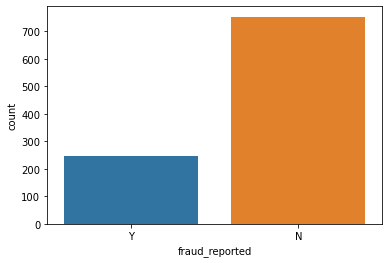

In [376]:
sns.countplot(data['fraud_reported'])

- There has been far less number of frauds detected represented by N. Y reprsesents yes for number of frauds detected.

<AxesSubplot:xlabel='fraud_reported', ylabel='policy_state'>

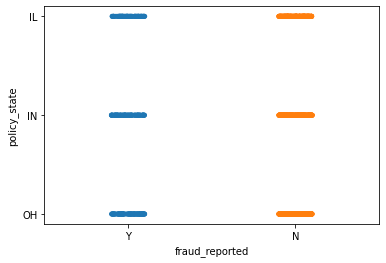

In [377]:
sns.stripplot(x='fraud_reported',y='policy_state',data=data)

- There is no relationship seen between fraud reported and policy_state. 

<AxesSubplot:xlabel='fraud_reported', ylabel='policy_csl'>

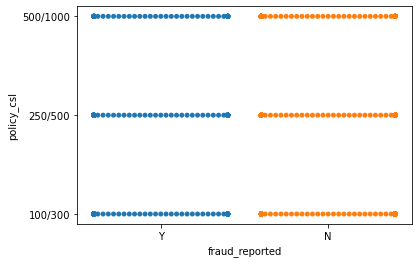

In [378]:
sns.swarmplot(x='fraud_reported',y='policy_csl',data=data)

<AxesSubplot:xlabel='fraud_reported', ylabel='policy_annual_premium'>

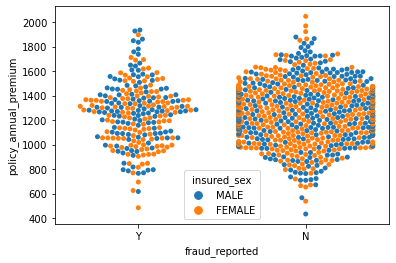

In [379]:
sns.swarmplot(x='fraud_reported',y='policy_annual_premium',data=data,hue='insured_sex')

- It can be seen that less number of frauds were detected.There is no relation of frauds with repect to premium paid.


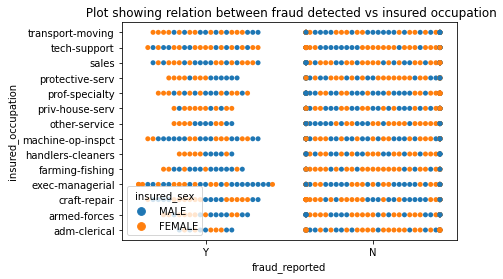

In [386]:
sns.swarmplot(x='fraud_reported',y='insured_occupation',data=data,hue='insured_sex')
plt.title(' Plot showing relation between fraud detected vs insured occupation')
plt.show()

- exec-managerial, tech-support and machine op instructors are the ones more involved in insurnace frauds

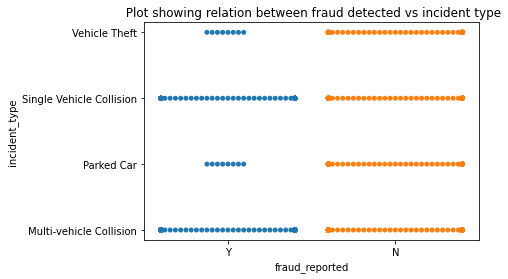

In [387]:
sns.swarmplot(x='fraud_reported',y='incident_type',data=data)
plt.title(' Plot showing relation between fraud detected vs incident type')
plt.show()

- Frauds reported in more  incases of single and multi vehicle collisions. There were less frauds detected in vehicle theft and parked ccar incidents.

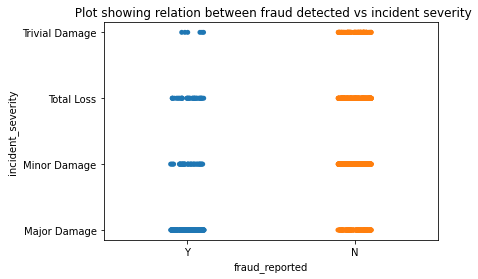

In [388]:
sns.stripplot(x='fraud_reported',y='incident_severity',data=data)
plt.title(' Plot showing relation between fraud detected vs incident severity')
plt.show()

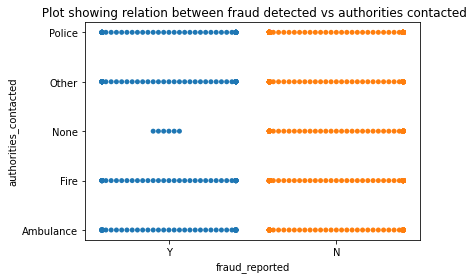

In [389]:
sns.swarmplot(x='fraud_reported',y='authorities_contacted',data=data)
plt.title(' Plot showing relation between fraud detected vs authorities contacted')
plt.show()

- In both cases authorities were contacted.

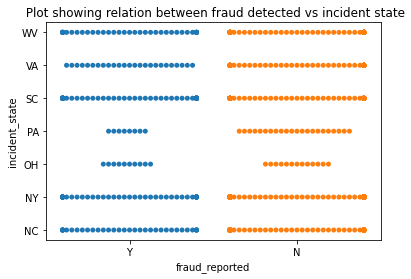

In [393]:
sns.swarmplot(x='fraud_reported',y='incident_state',data=data)
plt.title(' Plot showing relation between fraud detected vs incident state')
plt.show()

- Very less frauds were detected in PA and OH states.

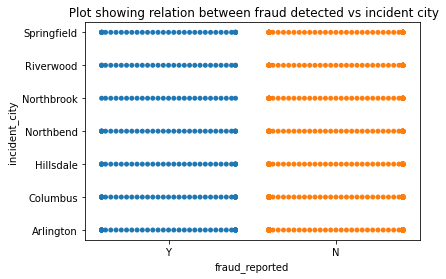

In [394]:
sns.swarmplot(x='fraud_reported',y='incident_city',data=data)
plt.title(' Plot showing relation between fraud detected vs incident city')
plt.show()

- There is not any distiguishing relationship seen in above plot.

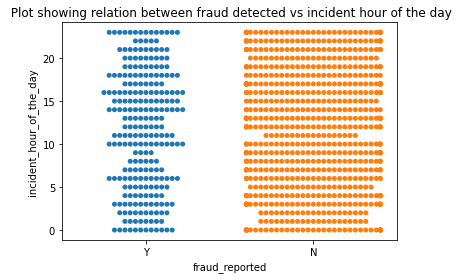

In [395]:
sns.swarmplot(x='fraud_reported',y='incident_hour_of_the_day',data=data)
plt.title(' Plot showing relation between fraud detected vs incident hour of the day')
plt.show()

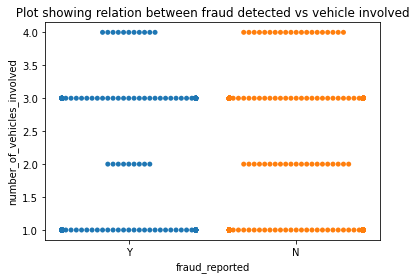

In [396]:
sns.swarmplot(x='fraud_reported',y='number_of_vehicles_involved',data=data)
plt.title(' Plot showing relation between fraud detected vs vehicle involved ')
plt.show()

- Most frauds have been seen in cases where collisions single and 3 car collisions are seen.

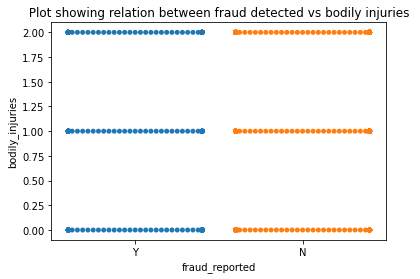

In [400]:
sns.swarmplot(x='fraud_reported',y='bodily_injuries',data=data)
plt.title(' Plot showing relation between fraud detected vs bodily injuries ')
plt.show()

- There can be no relationship seen in above plot.

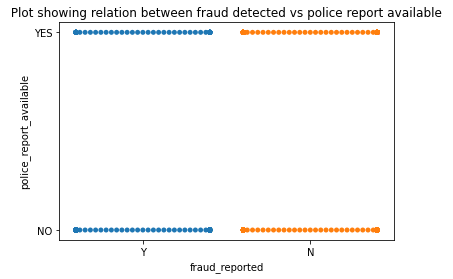

In [426]:
sns.swarmplot(x='fraud_reported',y='police_report_available',data=data)
plt.title(' Plot showing relation between fraud detected vs police report available ')
plt.show()

- In both types police report is available but relationship cannot be undestood by looking at the plot.

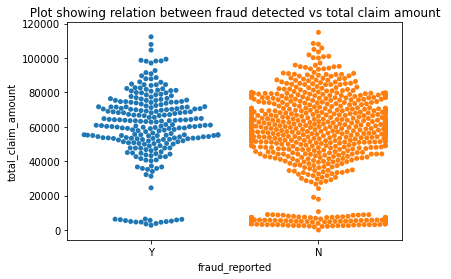

In [433]:
sns.swarmplot(x='fraud_reported',y='total_claim_amount',data=data)
plt.title(' Plot showing relation between fraud detected vs total claim amount ')
plt.show()

- Frauds that are reported have total claim amount in the range of 50000 to 80000 USD.
- There are some frauds reported for claim amount >100000 USD.

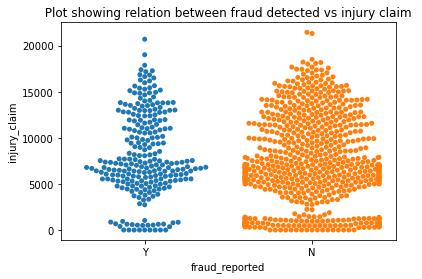

In [437]:
sns.swarmplot(x='fraud_reported',y='injury_claim',data=data)
plt.title(' Plot showing relation between fraud detected vs injury claim ')
plt.show()

- Less frauds are reported when injury claim amount increases >9000 USD.

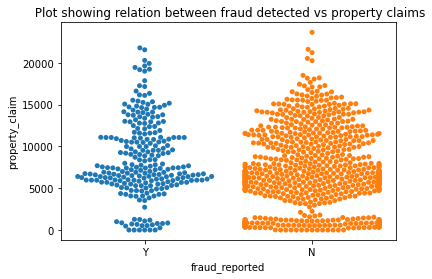

In [439]:
sns.swarmplot(x='fraud_reported',y='property_claim',data=data)
plt.title(' Plot showing relation between fraud detected vs property claims')
plt.show()

- Most number of property claim frauds are seen in range of 4000-7000 USD, while frauds reported are less as the claim amount increases.

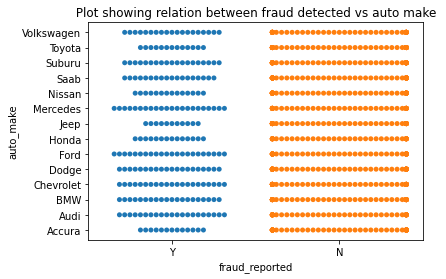

In [442]:
sns.swarmplot(x='fraud_reported',y='auto_make',data=data)
plt.title(' Plot showing relation between fraud detected vs auto make ')
plt.show()

- Most frauds are seen for people driving Mercedes, Volkswagen, Audi and Ford  cars.
- Least frauds are seen in people driving Jeep cars.

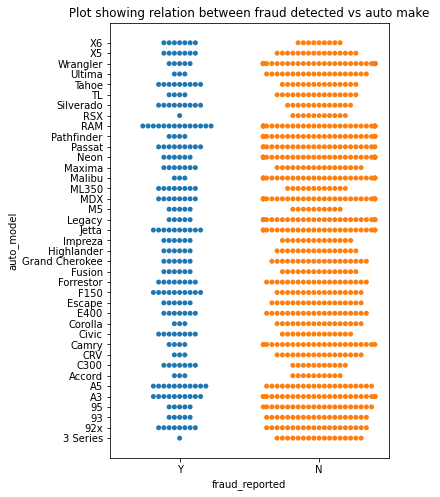

In [445]:
plt.figure(figsize=(5,8))
sns.swarmplot(x='fraud_reported',y='auto_model',data=data)
plt.title(' Plot showing relation between fraud detected vs auto make ')
plt.show()

- It can be seen from the plot that most frauds reported for RAM, JETTA, A3 and A5 car models.

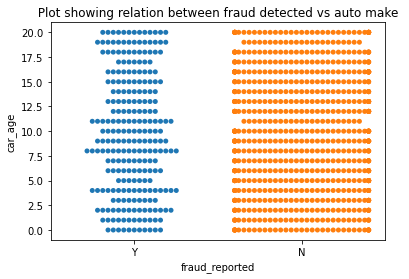

In [452]:
sns.swarmplot(x='fraud_reported',y='car_age',data=data)
plt.title(' Plot showing relation between fraud detected vs car age ')
plt.show()

- There is no good relation stating that fraud is related to particular aged cars only. 

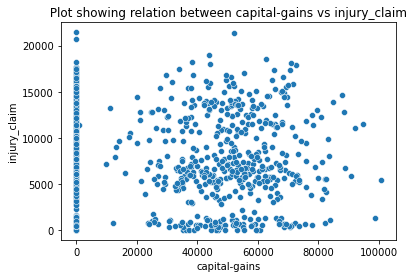

In [458]:
sns.scatterplot(x='capital-gains',y='injury_claim',data=data)
plt.title(' Plot showing relation between capital-gains vs injury_claim ')
plt.show()

- There is no distinguishing relation seen in above plot.

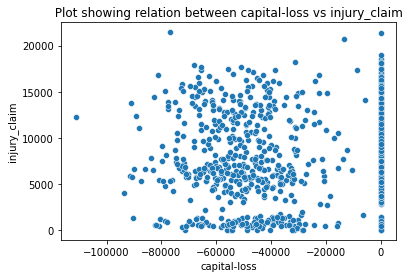

In [460]:
sns.scatterplot(x='capital-loss',y='injury_claim',data=data)
plt.title(' Plot showing relation between capital-loss vs injury_claim ')
plt.show()

- There is no distinguishing relation seen in above plot.

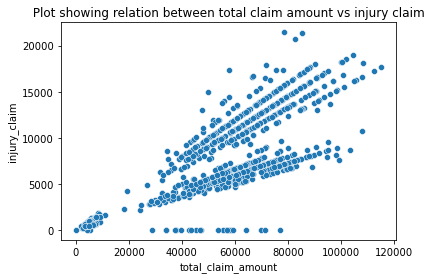

In [463]:
sns.scatterplot(x='total_claim_amount',y='injury_claim',data=data)
plt.title(' Plot showing relation between total claim amount vs injury claim ')
plt.show()

- The above plot shows a positive relation indicating that if claim amount is more then injury claim amount is also more.

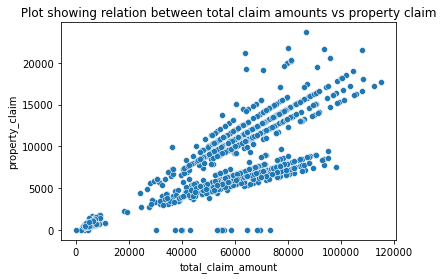

In [464]:
sns.scatterplot(x='total_claim_amount',y='property_claim',data=data)
plt.title(' Plot showing relation between total claim amounts vs property claim ')
plt.show()

- The above plot shows a positive relation indicating that if claim amount is more then property claim amount is also more.

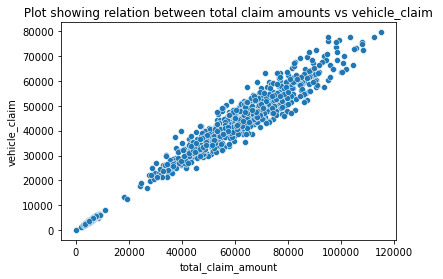

In [465]:
sns.scatterplot(x='total_claim_amount',y='vehicle_claim',data=data)
plt.title(' Plot showing relation between total claim amounts vs vehicle_claim ')
plt.show()

The above plot shows a positive relation indicating that if claim amount is more then vehicle claim amount is also more.

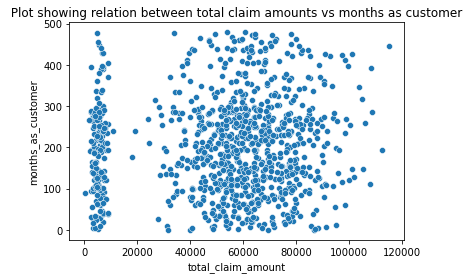

In [466]:
sns.scatterplot(x='total_claim_amount',y='months_as_customer',data=data)
plt.title(' Plot showing relation between total claim amounts vs months as customer ')
plt.show()

- There is no distinguishing relation seen in above plot.

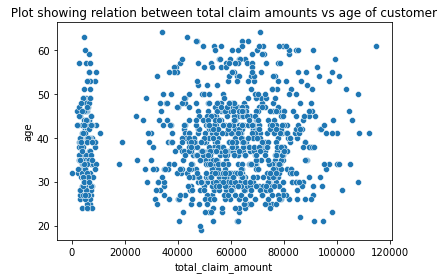

In [467]:
sns.scatterplot(x='total_claim_amount',y='age',data=data)
plt.title(' Plot showing relation between total claim amounts vs age of customer ')
plt.show()

There is no distinguishing relation seen in above plot.

In [453]:
# printing dataset information

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_state                 1000 non-null   object 
 3   policy_csl                   1000 non-null   object 
 4   policy_deductable            1000 non-null   int64  
 5   policy_annual_premium        1000 non-null   float64
 6   umbrella_limit               1000 non-null   int64  
 7   insured_sex                  1000 non-null   object 
 8   insured_education_level      1000 non-null   object 
 9   insured_occupation           1000 non-null   object 
 10  insured_hobbies              1000 non-null   object 
 11  insured_relationship         1000 non-null   object 
 12  capital-gains                1000 non-null   int64  
 13  capital-loss       

In [469]:
# Dataset shape

data.shape

(1000, 35)

# Encoding data using Label Encoder

In [470]:
#importing library for label encoder

from sklearn.preprocessing import LabelEncoder

label_enc=LabelEncoder()

In [473]:
#transforming the data
df1=label_enc.fit_transform(data['policy_state'])
df2=label_enc.fit_transform(data['policy_csl'])
df3=label_enc.fit_transform(data['policy_deductable'])
df4=label_enc.fit_transform(data['umbrella_limit'])
df5=label_enc.fit_transform(data['insured_sex'])
df6=label_enc.fit_transform(data['insured_education_level'])
df7=label_enc.fit_transform(data['insured_occupation'])
df8=label_enc.fit_transform(data['insured_hobbies'])
df9=label_enc.fit_transform(data['insured_relationship'])
df11=label_enc.fit_transform(data['incident_type'])
df12=label_enc.fit_transform(data['collision_type'])
df13=label_enc.fit_transform(data['incident_severity'])
df14=label_enc.fit_transform(data['authorities_contacted'])
df15=label_enc.fit_transform(data['incident_state'])
df16=label_enc.fit_transform(data['incident_city'])
df17=label_enc.fit_transform(data['incident_hour_of_the_day'])
df18=label_enc.fit_transform(data['number_of_vehicles_involved'])
df19=label_enc.fit_transform(data['property_damage'])
df20=label_enc.fit_transform(data['bodily_injuries'])
df21=label_enc.fit_transform(data['witnesses'])
df22=label_enc.fit_transform(data['police_report_available'])
df23=label_enc.fit_transform(data['auto_make'])
df24=label_enc.fit_transform(data['auto_model'])
df25=label_enc.fit_transform(data['fraud_reported'])
df26=label_enc.fit_transform(data['car_age'])


In [474]:
data['policy_state']=df1
data['policy_csl']=df2
data['policy_deductable']=df3
data['umbrella_limit']=df4
data['insured_sex']=df5
data['insured_education_level']=df6
data['insured_occupation']=df7
data['insured_hobbies']=df8
data['insured_relationship']=df9
data['incident_type']=df11
data['collision_type']=df12
data['incident_severity']=df13
data['authorities_contacted']=df14
data['incident_state']=df15
data['incident_city']=df16
data['incident_hour_of_the_day']=df17
data['number_of_vehicles_involved']=df18
data['property_damage']=df19
data['bodily_injuries']=df20
data['witnesses']=df21
data['police_report_available']=df22
data['auto_make']=df23
data['auto_model']=df24
data['fraud_reported']=df25
data['car_age']=df26

In [476]:
data.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported,car_age
0,328,48,2,1,1,1406.91,1,1,4,2,...,2,1,71610,6510,13020,52080,10,1,1,11
1,228,42,1,1,2,1197.22,5,1,4,6,...,0,0,5070,780,780,3510,8,12,1,8
2,134,29,2,0,2,1413.14,5,0,6,11,...,3,0,34650,7700,3850,23100,4,30,0,8
3,256,41,0,1,2,1415.74,6,0,6,1,...,2,0,63400,6340,6340,50720,3,34,1,1
4,228,44,0,2,1,1583.91,6,1,0,11,...,1,0,6500,1300,650,4550,0,31,0,6


In [478]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_state                 1000 non-null   int32  
 3   policy_csl                   1000 non-null   int32  
 4   policy_deductable            1000 non-null   int64  
 5   policy_annual_premium        1000 non-null   float64
 6   umbrella_limit               1000 non-null   int64  
 7   insured_sex                  1000 non-null   int32  
 8   insured_education_level      1000 non-null   int32  
 9   insured_occupation           1000 non-null   int32  
 10  insured_hobbies              1000 non-null   int32  
 11  insured_relationship         1000 non-null   int32  
 12  capital-gains                1000 non-null   int64  
 13  capital-loss       

In [479]:
data.describe()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported,car_age
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,1.01400,0.951000,0.965000,1256.406150,1.900000,0.463000,2.966000,6.653000,...,1.487000,0.314000,52761.94000,7433.420000,7399.570000,37928.950000,6.546000,19.318000,0.247000,9.897000
std,115.113174,9.140287,0.83096,0.804516,0.805247,244.167395,1.917205,0.498879,1.948497,4.019048,...,1.111335,0.464349,26401.53319,4880.951853,4824.726179,18886.252893,4.034869,11.136107,0.431483,6.015861
min,0.000000,19.000000,0.00000,0.000000,0.000000,433.330000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,0.000000,0.000000,0.000000,0.000000
25%,115.750000,32.000000,0.00000,0.000000,0.000000,1089.607500,1.000000,0.000000,1.000000,3.000000,...,1.000000,0.000000,41812.50000,4295.000000,4445.000000,30292.500000,3.000000,10.000000,0.000000,5.000000
50%,199.500000,38.000000,1.00000,1.000000,1.000000,1257.200000,1.000000,0.000000,3.000000,7.000000,...,1.000000,0.000000,58055.00000,6775.000000,6750.000000,42100.000000,7.000000,20.000000,0.000000,10.000000
75%,276.250000,44.000000,2.00000,2.000000,2.000000,1415.695000,1.000000,1.000000,5.000000,10.000000,...,2.000000,1.000000,70592.50000,11305.000000,10885.000000,50822.500000,10.000000,29.000000,0.000000,15.000000
max,479.000000,64.000000,2.00000,2.000000,2.000000,2047.590000,10.000000,1.000000,6.000000,13.000000,...,3.000000,1.000000,114920.00000,21450.000000,23670.000000,79560.000000,13.000000,38.000000,1.000000,20.000000


- Looking at the above it can be seen that in continuos data columns such as policy annual premium, there is presence of outliers.

**Plotting the correlation matrix to check for correlation**

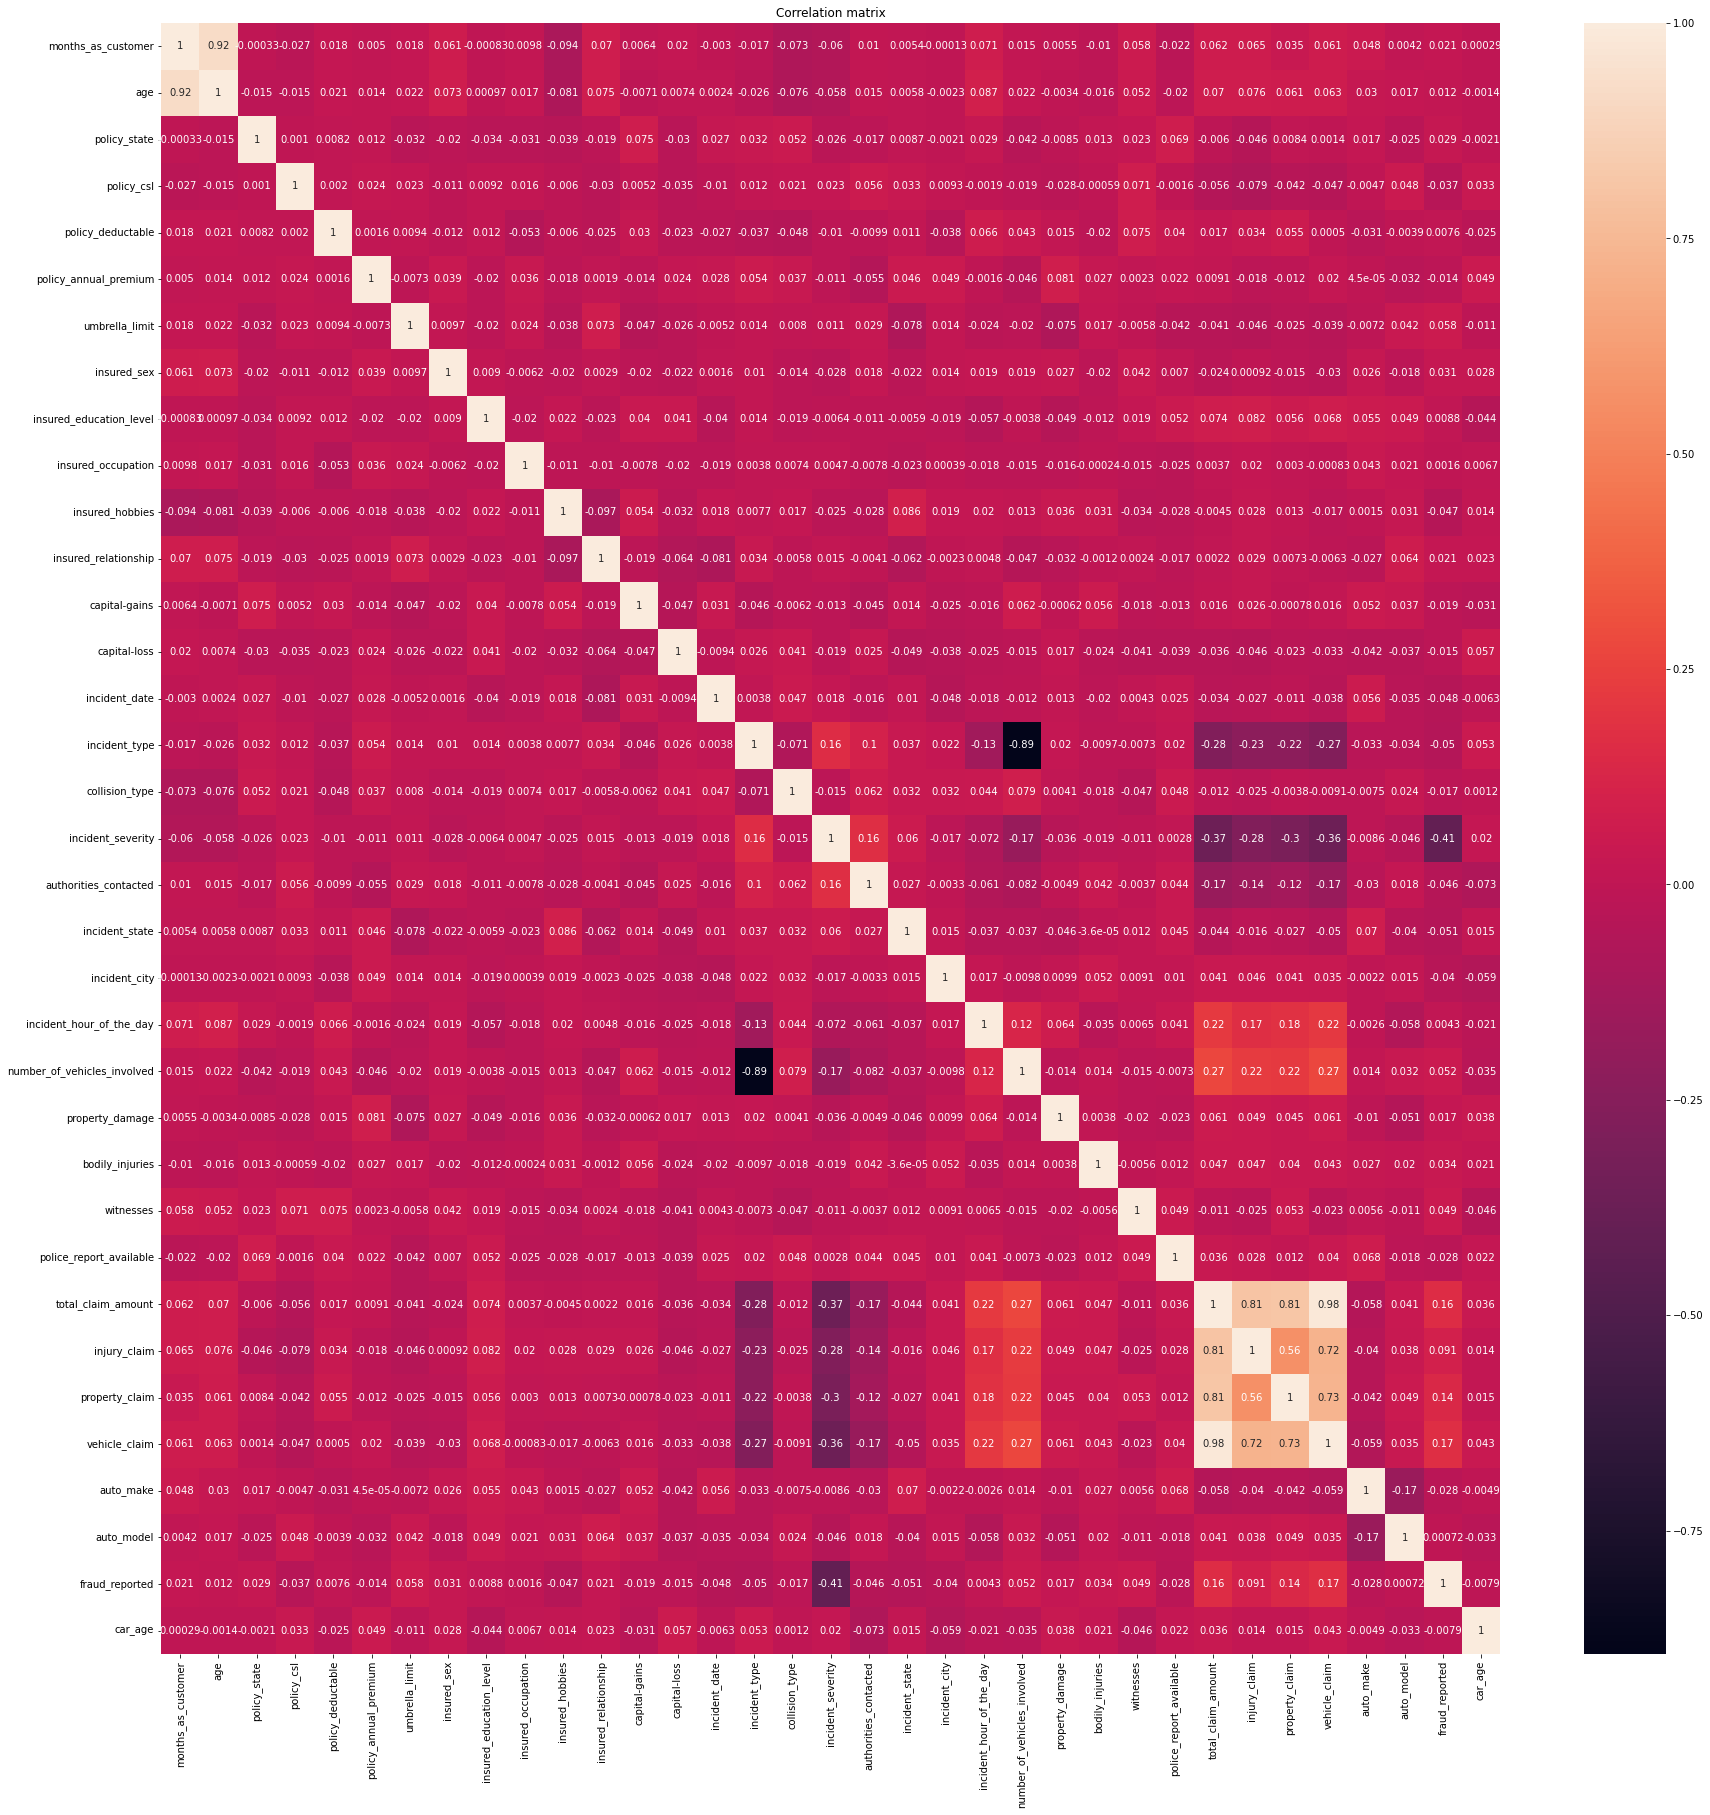

In [481]:
#plotting heatmap

plt.figure(figsize=(30,30))
corr=data.corr()
sns.heatmap(corr,annot=True)
plt.title('Correlation matrix')
plt.show()

- I consider >75% as the degree for multicollinearity problem.
- Keeping that in mind I can say that age is related to months as customer column.
- No. of vehicles involved is negatively related to incident type.
- Total claim amount is directly related to vehicle claim,injury claim and property claim.

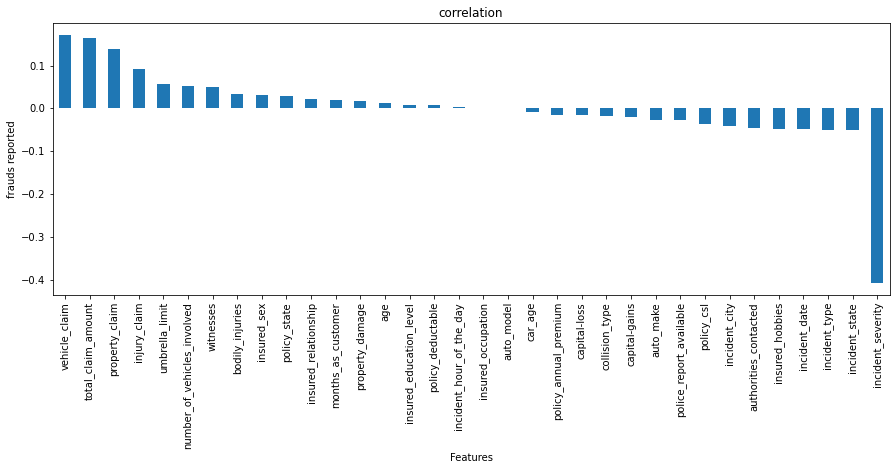

In [484]:
#plotting a coorelation plot that will show relation of features with label(region)

plt.figure(figsize=(15,5))
data.corr()['fraud_reported'].sort_values(ascending=False).drop(['fraud_reported']).plot(kind='bar')
plt.xlabel('Features')
plt.ylabel('frauds reported')
plt.title('correlation')
plt.show()

**Scatterplots showing relationship between Total claim amount that is directly related to vehicle claim,injury claim and property claims is already plotted above.**
- Plotting remaining scatter plots that shows correlation

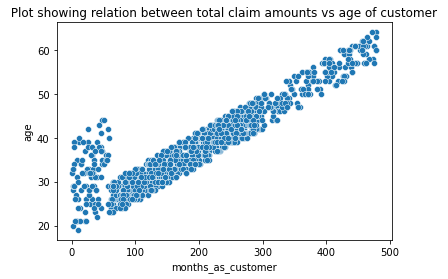

In [485]:
sns.scatterplot(x='months_as_customer',y='age',data=data)
plt.title(' Plot showing relation between months as customer vs age of customer ')
plt.show()

- This plot shows a positive trend confirming their multicollinearity.

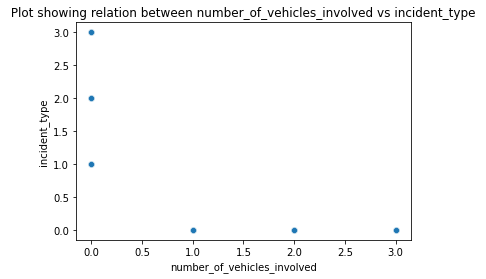

In [488]:
sns.scatterplot(x='number_of_vehicles_involved',y='incident_type',data=data)
plt.title(' Plot showing relation between number_of_vehicles_involved vs incident_type ')
plt.show()

# Checking for outliers in dataset

In [489]:
data.columns

Index(['months_as_customer', 'age', 'policy_state', 'policy_csl',
       'policy_deductable', 'policy_annual_premium', 'umbrella_limit',
       'insured_sex', 'insured_education_level', 'insured_occupation',
       'insured_hobbies', 'insured_relationship', 'capital-gains',
       'capital-loss', 'incident_date', 'incident_type', 'collision_type',
       'incident_severity', 'authorities_contacted', 'incident_state',
       'incident_city', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'fraud_reported', 'car_age'],
      dtype='object')

In [492]:
features=['months_as_customer','age', 'policy_annual_premium','capital-gains', 'capital-loss',
       'incident_date','incident_hour_of_the_day','total_claim_amount','injury_claim','property_claim','vehicle_claim','car_age']

In [493]:
len(features)

12

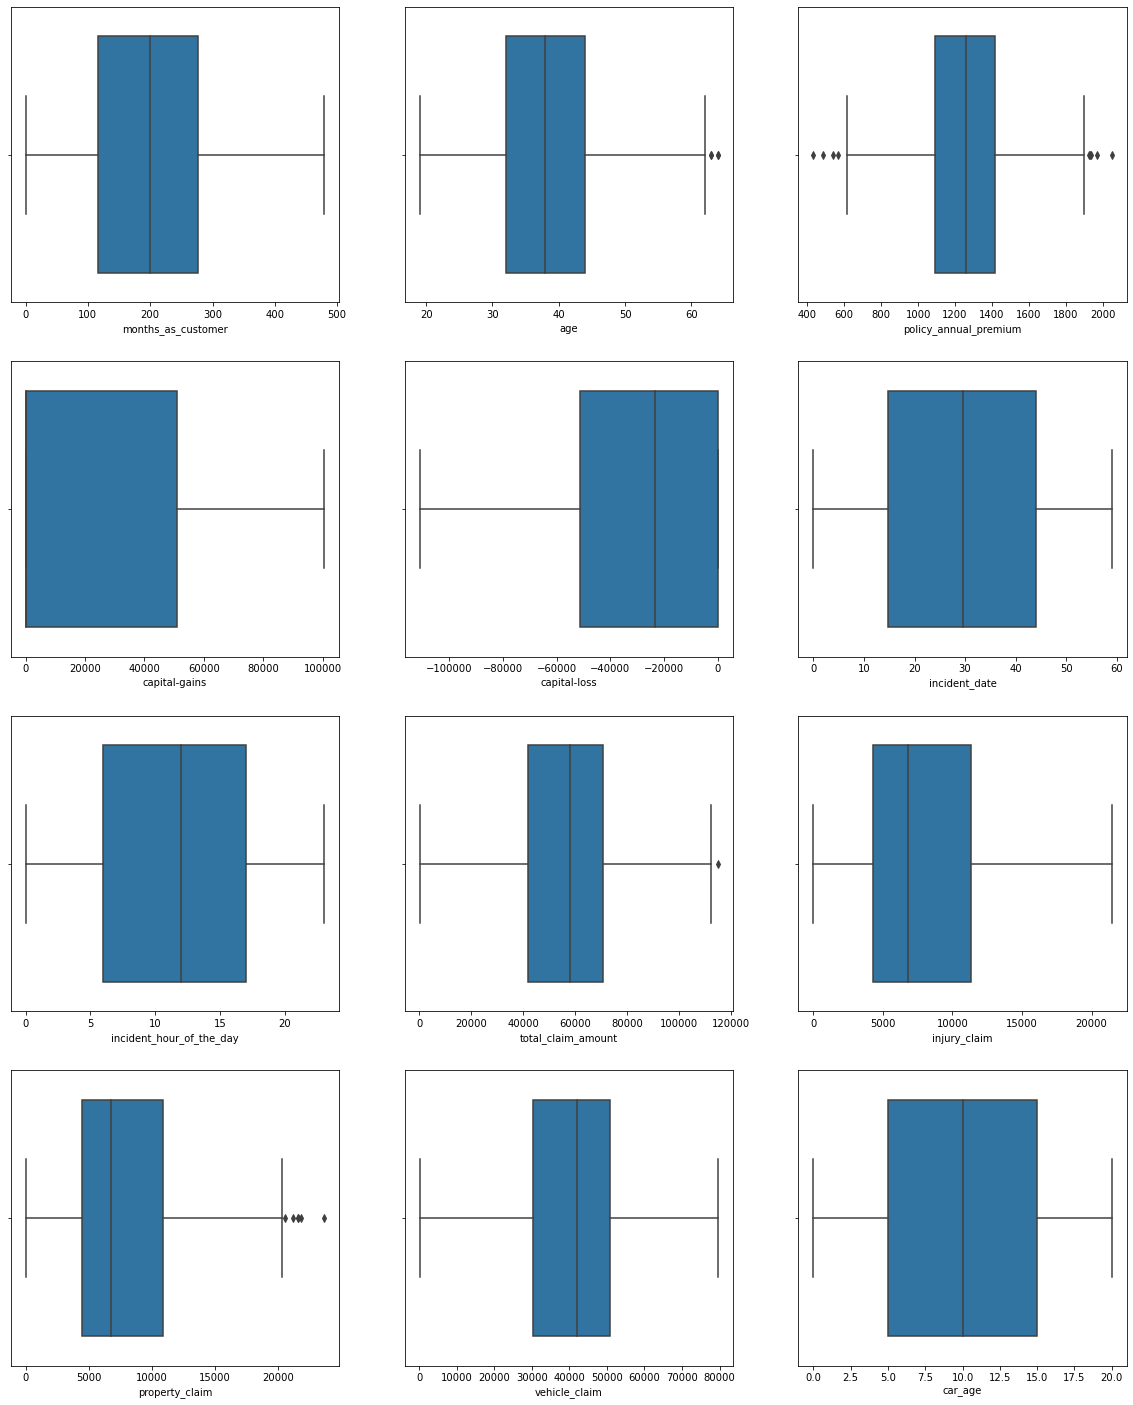

In [494]:
plt.figure(figsize=(20,25))
plotnumber=1

for column in features:
    if plotnumber<=12:
        ax=plt.subplot(4,3,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column)
    plotnumber+=1
plt.show()

- **Since outliers can be seen in plots, I need to treat/remove them using z-score method.**

# Removal of outliers using z-score method

In [495]:
#importing z score library

from scipy.stats import zscore

In [497]:
z_score=zscore(data[['months_as_customer','age', 'policy_annual_premium','capital-gains', 'capital-loss',
       'incident_date','incident_hour_of_the_day','total_claim_amount','injury_claim','property_claim','vehicle_claim','car_age']])

In [498]:
abs_z_score=np.abs(z_score)

In [499]:
filtering_entry=(abs_z_score<3).all(axis=1)

In [500]:
data=data[filtering_entry]

In [501]:
data.shape

(995, 35)

# Data loss after removing outliers

In [502]:
# data loss percentage 
data_loss=((1000-995)/995)*100
print(f'data loss in percent after removing outliers is: {data_loss}%')

data loss in percent after removing outliers is: 0.5025125628140703%


# Checking for skewness in dataset

In [503]:
data.skew()

months_as_customer             0.358958
age                            0.473974
policy_state                  -0.028196
policy_csl                     0.093128
policy_deductable              0.062014
policy_annual_premium          0.033107
umbrella_limit                 1.927891
insured_sex                    0.143294
insured_education_level        0.001403
insured_occupation            -0.061818
insured_hobbies               -0.061489
insured_relationship           0.078491
capital-gains                  0.479472
capital-loss                  -0.379708
incident_date                  0.002649
incident_type                  0.101056
collision_type                -0.033901
incident_severity              0.274925
authorities_contacted         -0.122469
incident_state                -0.146787
incident_city                  0.047785
incident_hour_of_the_day      -0.040232
number_of_vehicles_involved    0.503045
property_damage                0.855977
bodily_injuries                0.012979


In [504]:
features=['months_as_customer','age', 'policy_annual_premium','capital-gains', 'capital-loss',
       'incident_date','incident_hour_of_the_day','total_claim_amount','injury_claim','property_claim','vehicle_claim','car_age']

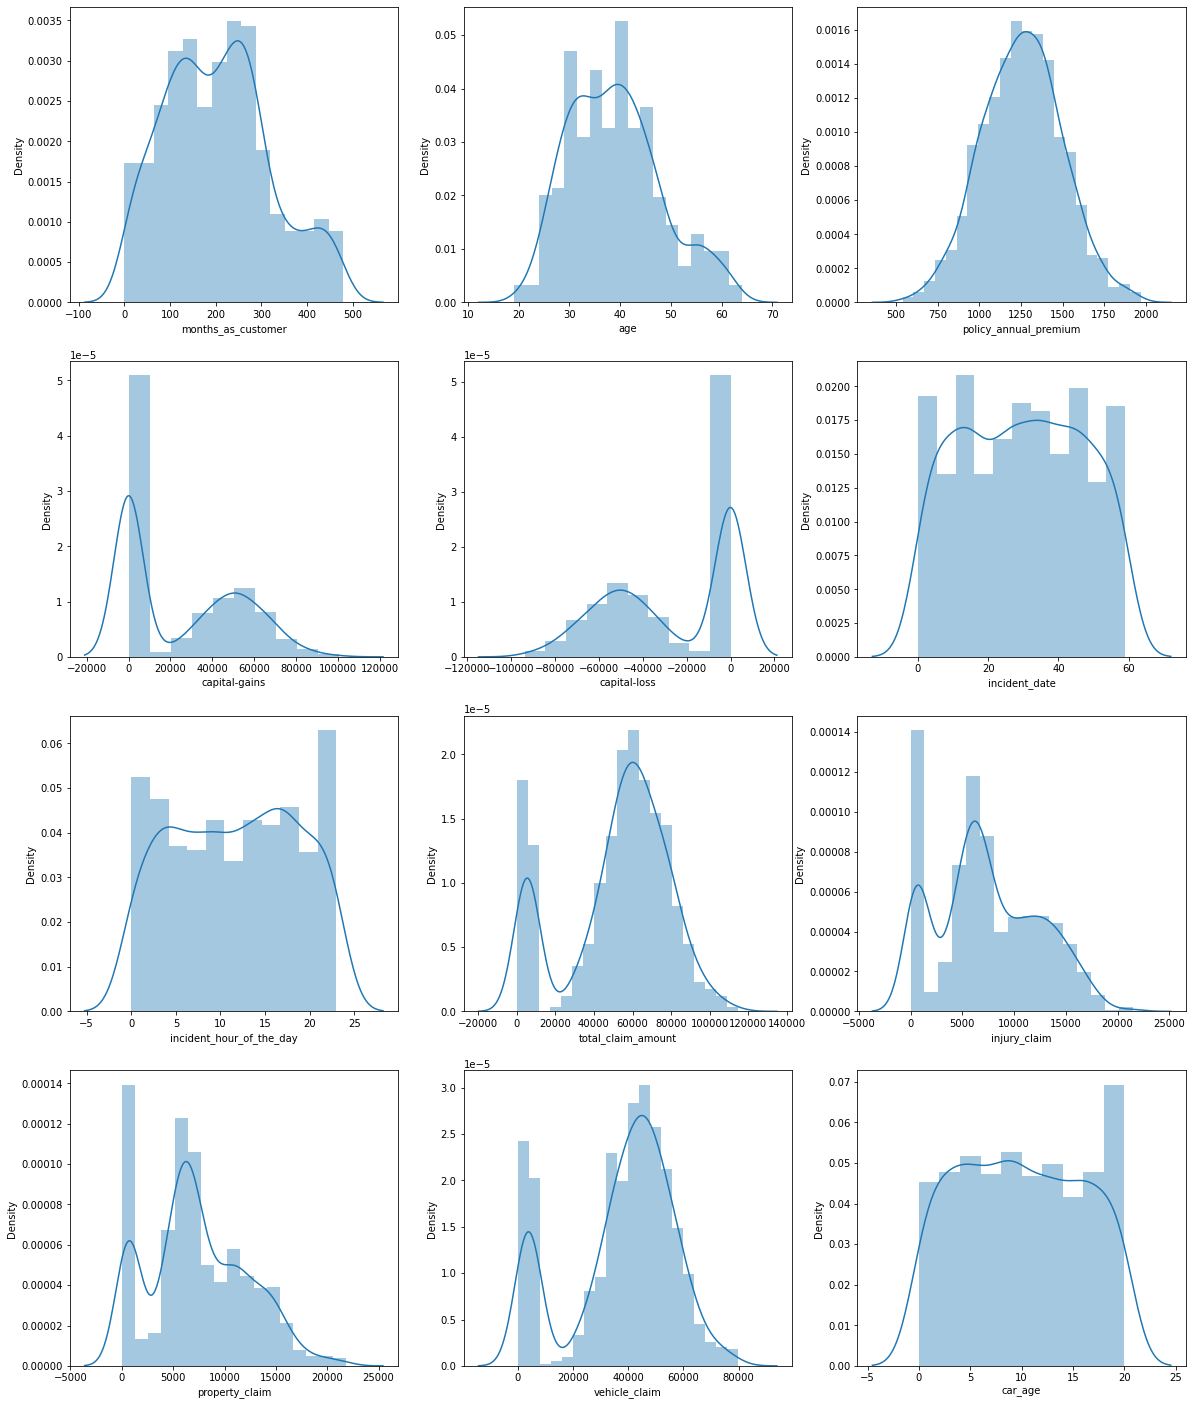

In [506]:
#plotting distplots for continuous columns 

plt.figure(figsize=(20,25))
plotnumber=1

for column in features:
    if plotnumber<=12:
        ax=plt.subplot(4,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column)
    plotnumber+=1
plt.show()

**skewness can be seen in above plots for some columns, hence removing skewness using power transformer method.**

# Hence removing skewness using Power Transformer

In [507]:
#importing library
from sklearn.preprocessing import PowerTransformer

scaler=PowerTransformer(method='yeo-johnson') #using yeo-johnson method to transform

In [508]:
#transforming the data
data[features]=scaler.fit_transform(data[features])

In [509]:
#printing features to check for skewness
data[features].skew()

months_as_customer         -0.134350
age                        -0.002319
policy_annual_premium      -0.006511
capital-gains               0.044731
capital-loss                0.089077
incident_date              -0.262439
incident_hour_of_the_day   -0.257721
total_claim_amount         -0.508520
injury_claim               -0.414980
property_claim             -0.362801
vehicle_claim              -0.521039
car_age                    -0.217170
dtype: float64

In [511]:
#checking value count in label
data['fraud_reported'].value_counts()

0    749
1    246
Name: fraud_reported, dtype: int64

**It can be seen that values of some fuels are oversampled,**
# Hence applying SMOTE to remove Oversampling¶

In [513]:
#splitting data into features and label

x=data.drop(['fraud_reported'],axis=1)
y=data['fraud_reported']

In [518]:
#importing library for SMOTE
from imblearn.over_sampling import SMOTE
from collections import Counter

sm=SMOTE(0.90)

In [519]:
x_new,y_new=sm.fit_resample(x,y)
print('The no. of classes before fit',format(Counter(y)))
print('The no. of classes after fit',format(Counter(y_new)))

The no. of classes before fit Counter({0: 749, 1: 246})
The no. of classes after fit Counter({0: 749, 1: 674})


In [520]:
# Scaling the data

In [521]:
#importing data scaling library
from sklearn.preprocessing import StandardScaler

In [522]:
#Standardizing data
scaler=StandardScaler()

In [532]:
x_scaled=scaler.fit_transform(x_new)

In [533]:
x_scaled

array([[ 1.06512849,  1.02334318,  1.32817617, ...,  0.89301035,
        -1.6359117 ,  0.26091493],
       [ 0.2945308 ,  0.42842297,  0.08475861, ...,  0.39594259,
        -0.64293334, -0.25137374],
       [-0.54700121, -1.18644021,  1.32817617, ..., -0.59819293,
         0.98194033, -0.25137374],
       ...,
       [-0.45334565, -0.82014347,  0.08475861, ...,  1.14154423,
        -0.82347486, -1.29603904],
       [-1.89389737, -0.28738847,  0.08475861, ..., -0.84672681,
         1.16248185,  1.42067425],
       [ 0.52009653,  0.53594945, -1.15865895, ..., -1.34379457,
        -1.36509942, -0.10055722]])

# VIF

In [534]:
#importing VIF library

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [535]:
vif=pd.DataFrame()
vif['vif_values']=[variance_inflation_factor(x_scaled,i)for i in range(x_scaled.shape[1])]
vif['feature_names']=x.columns
vif

,vif_values,feature_names
0,5.058430,months_as_customer
1,5.062638,age
2,1.055534,policy_state
3,1.064120,policy_csl
4,1.066142,policy_deductable
5,1.044108,policy_annual_premium
6,1.034086,umbrella_limit
7,1.060037,insured_sex
8,1.051441,insured_education_level
9,1.038099,insured_occupation


-**If any features shows VIF values of >5 then it is said that those features are multicorrelated and one feature which is least related is dropped. The features that are correlated are previously mentioned.**

- **Since I do not know which features are actually important for fraud detection, Hence I'm going to use PCA method.**


# Using Principal component Analysis (PCA) to know which features are important to understand dataset.

In [536]:
#importing libraries for PCA and standard scaler

from sklearn.decomposition import PCA

In [537]:
#saving in variable

pca=PCA()

In [538]:
#fit and transforming features to PCA

pca.fit_transform(x_scaled)

array([[-0.44794724, -1.2384431 ,  0.35339365, ...,  0.13999719,
         0.0468318 , -0.01795047],
       [ 4.32997051, -0.85089253, -0.24845333, ..., -0.59754872,
         0.02654575,  0.03027186],
       [ 0.89838056,  1.07812164,  1.29983297, ..., -0.0467258 ,
        -0.49579316, -0.04705704],
       ...,
       [ 0.03782381,  0.71472416, -2.04322842, ..., -0.22567383,
         0.07133431,  0.07377855],
       [-0.84386761,  2.23037108, -0.09450766, ..., -0.19109483,
         0.98966013, -0.01757302],
       [-0.18563467, -0.19895452,  0.94253395, ...,  0.31463826,
         0.02122239, -0.02021343]])

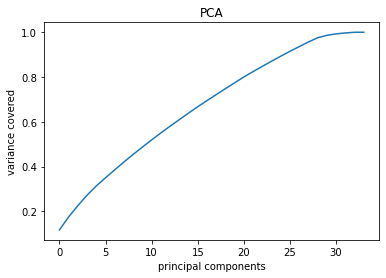

In [539]:
#plotting curve to see how many featutes are related

plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('principal components')
plt.ylabel('variance covered')
plt.title('PCA')
plt.show()

- At 28 features the curve is covering most of the data, Hence  taking 11 features and dropping rest of them.

In [540]:
#selecting 28 features as the best ones in model building

pca=PCA(n_components=28)
new_comp=pca.fit_transform(x_scaled)

In [541]:
#creating a dataframe of new features

princi_comp=pd.DataFrame(new_comp,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9',
                                          'PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18','PC19','PC20',
                                          'PC21','PC22','PC23','PC24','PC25','PC26','PC27','PC28'])
princi_comp

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28
0,-0.447947,-1.238443,0.353394,3.147629,-2.860187,0.173067,-0.115402,-0.659168,-1.308795,1.158368,...,0.857859,-0.017611,-0.294626,0.137364,0.913242,0.791766,-1.881538,0.614754,0.314298,0.483332
1,4.329971,-0.850893,-0.248453,0.207917,-0.110075,-0.154096,-1.055574,0.019489,-0.106406,1.269713,...,0.639056,1.940773,0.250904,0.629445,-0.868389,-0.545014,-0.182530,0.303629,1.693149,-0.013440
2,0.898381,1.078122,1.299833,-0.346875,1.865721,-0.083032,-0.774825,-0.608497,-0.500146,-1.530099,...,-0.955803,1.014167,-0.760239,0.714311,0.214630,0.345595,0.470345,-0.840334,0.345152,-1.664511
3,-0.107920,-1.288612,-1.391213,-0.440185,2.825983,-2.520563,-0.763029,-0.484532,-0.404800,-0.316163,...,0.104820,0.735923,-0.081958,-1.858996,0.518034,0.308878,-1.064289,0.366916,-0.857804,-0.491633
4,3.594386,-1.725954,-0.619907,-1.051271,2.413925,0.091538,1.393298,0.273628,-0.441534,-0.912605,...,0.860498,0.986313,-0.400714,-1.174570,1.576257,-1.338563,0.261129,0.572063,-1.229114,0.224025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1418,-0.182677,-1.063431,-2.236393,-1.332672,-0.038829,0.149820,-0.084537,0.744064,-0.338319,-0.429798,...,0.616530,0.550856,0.556986,-0.250252,0.061809,0.308191,0.913987,-0.976729,0.104275,0.345735
1419,0.593412,1.300849,-0.272617,-0.090127,-0.481458,-0.798805,-0.455983,-0.324506,0.309401,0.099554,...,0.948986,-0.774598,-0.942169,0.532290,-1.058359,-0.710625,-0.665053,0.798829,-0.527383,-0.585297
1420,0.037824,0.714724,-2.043228,-1.398776,-0.149538,-0.402854,-2.262530,-0.641844,1.153444,-0.747417,...,1.133556,1.219953,0.843543,-0.278072,0.516758,0.930729,-0.190431,0.847254,0.580113,0.603436
1421,-0.843868,2.230371,-0.094508,-1.396004,0.873900,1.895898,0.610019,1.367239,-1.309808,-0.378165,...,1.228657,-0.801196,0.180610,-0.600902,-0.437706,-0.363358,-0.248102,0.296764,0.221075,0.080665


# Model Buiding part

In [542]:
#Logistic Regression Model
#importing libraries

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score

In [543]:
#assigning variable to model
lr=LogisticRegression()

In [544]:
#finding best random state for model
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(princi_comp,y_new,test_size=0.25,random_state=i)
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_train)
    pred=lr.predict(x_test)
    print('training accuracy is ',(accuracy_score(y_train,y_pred)*100),' for random state ',i)
    print('testing accuracy is ',(accuracy_score(y_test,pred)*100),' for random state ',i)
    '\n'

training accuracy is  76.1012183692596  for random state  0
testing accuracy is  71.34831460674157  for random state  0
training accuracy is  76.1012183692596  for random state  1
testing accuracy is  72.47191011235955  for random state  1
training accuracy is  74.78912839737582  for random state  2
testing accuracy is  76.40449438202246  for random state  2
training accuracy is  75.91377694470478  for random state  3
testing accuracy is  73.03370786516854  for random state  3
training accuracy is  75.25773195876289  for random state  4
testing accuracy is  77.52808988764045  for random state  4
training accuracy is  74.50796626054358  for random state  5
testing accuracy is  77.24719101123596  for random state  5
training accuracy is  76.47610121836927  for random state  6
testing accuracy is  70.78651685393258  for random state  6
training accuracy is  74.78912839737582  for random state  7
testing accuracy is  75.84269662921348  for random state  7
training accuracy is  74.695407685

**Taking random state as 14 for model building.**

In [545]:
#initiating train test split thereafter model training
x_train,x_test,y_train,y_test=train_test_split(princi_comp,y_new,test_size=0.25,random_state=14)

def metric_score(clf,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred=clf.predict(x_train)
        print('-----Training score-----')
        print(f'Accuracy score:{accuracy_score(y_train,y_pred)*100:.2f}%')
    elif train==False:
        pred=clf.predict(x_test)
        print('-----Testing score-----')
        print(f'Accuracy score:{accuracy_score(y_test,pred)*100:.2f}%')
        print('classification report \n',classification_report (y_test,pred))
        print('confusion matrix ',confusion_matrix(y_test,pred))
        print('F1 Score ',f1_score(y_test,pred))

In [546]:
lr.fit(x_train,y_train)

LogisticRegression()

In [547]:
#passing the function
metric_score(lr,x_train,x_test,y_train,y_test,train=True) # this is for training score

metric_score(lr,x_train,x_test,y_train,y_test,train=False) # this is for testing score

-----Training score-----
Accuracy score:75.26%
-----Testing score-----
Accuracy score:74.16%
classification report 
               precision    recall  f1-score   support

           0       0.75      0.74      0.75       183
           1       0.73      0.74      0.74       173

    accuracy                           0.74       356
   macro avg       0.74      0.74      0.74       356
weighted avg       0.74      0.74      0.74       356

confusion matrix  [[136  47]
 [ 45 128]]
F1 Score  0.7356321839080459


In [548]:
# using cross validation score to check if model is overfitted

#uploading cross validation library
from sklearn.model_selection import cross_val_score

In [550]:
#finding best value for cv in provided range
for i in range(2,20):
    cv_score=cross_val_score(lr,princi_comp,y_new,cv=i)
    cv=cv_score.mean()
    print('At cv:-',i)
    print('cross validation score:- ',cv*100)

At cv:- 2
cross validation score:-  70.27914078920337
At cv:- 3
cross validation score:-  72.32111925383077
At cv:- 4
cross validation score:-  72.9504272827979
At cv:- 5
cross validation score:-  72.3943661971831
At cv:- 6
cross validation score:-  72.95382287936273
At cv:- 7
cross validation score:-  73.66463826910073
At cv:- 8
cross validation score:-  73.51258490446264
At cv:- 9
cross validation score:-  73.72776406690905
At cv:- 10
cross validation score:-  73.95154141633014
At cv:- 11
cross validation score:-  73.89006342494714
At cv:- 12
cross validation score:-  73.39291648862934
At cv:- 13
cross validation score:-  73.33162250593443
At cv:- 14
cross validation score:-  73.74642926477522
At cv:- 15
cross validation score:-  73.94176931690932
At cv:- 16
cross validation score:-  73.72637895812053
At cv:- 17
cross validation score:-  73.60534575275895
At cv:- 18
cross validation score:-  73.58737693389592
At cv:- 19
cross validation score:-  73.52015173067805


In [551]:
#cross validation score
print('Cross Validation Score for Logistic regression model :- ',((cross_val_score(lr,princi_comp,y_new,cv=15).mean())*100))

Cross Validation Score for Logistic regression model :-  73.94176931690932


# Plotting ROC curve

In [552]:
#importing ROC curve library

from sklearn.metrics import roc_curve,auc

In [553]:
pred=lr.predict(x_test)
fpr,tpr,threshold=roc_curve(y_test,pred)
print('fpr',fpr)
print('tpr',tpr)
print('threshold',threshold)

fpr [0.        0.2568306 1.       ]
tpr [0.         0.73988439 1.        ]
threshold [2 1 0]


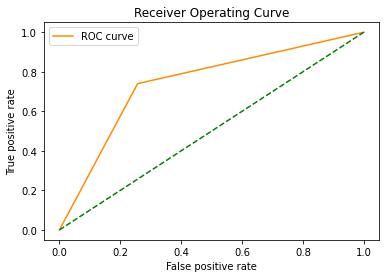

In [554]:
plt.plot(fpr,tpr,color='darkorange',label='ROC curve')
plt.plot([0,1],[0,1],color='green',linestyle='--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver Operating Curve')
plt.legend()
plt.show()

# Random Forests Classifier

In [555]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [556]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [557]:
#passing the function
metric_score(rf,x_train,x_test,y_train,y_test,train=True) # this is for training score

metric_score(rf,x_train,x_test,y_train,y_test,train=False) # this is for testing score

-----Training score-----
Accuracy score:100.00%
-----Testing score-----
Accuracy score:78.93%
classification report 
               precision    recall  f1-score   support

           0       0.76      0.85      0.81       183
           1       0.82      0.72      0.77       173

    accuracy                           0.79       356
   macro avg       0.79      0.79      0.79       356
weighted avg       0.79      0.79      0.79       356

confusion matrix  [[156  27]
 [ 48 125]]
F1 Score  0.7692307692307692


In [558]:
#cross validation score
print('Cross Validation Score for random forest model :- ',((cross_val_score(rf,princi_comp,y_new,cv=14).mean())*100))

Cross Validation Score for random forest model :-  79.30429597581607


# Plotting ROC Curve

In [559]:
pred=rf.predict(x_test)
fpr,tpr,threshold=roc_curve(y_test,pred)
print('fpr',fpr)
print('tpr',tpr)
print('threshold',threshold)

fpr [0.         0.14754098 1.        ]
tpr [0.         0.72254335 1.        ]
threshold [2 1 0]


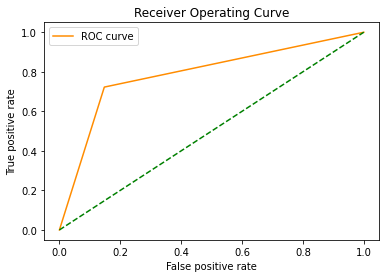

In [560]:
plt.plot(fpr,tpr,color='darkorange',label='ROC curve')
plt.plot([0,1],[0,1],color='green',linestyle='--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver Operating Curve')
plt.legend()
plt.show()

# Decision Tree Classifier

In [561]:
from sklearn.tree import DecisionTreeClassifier

In [562]:
dt=DecisionTreeClassifier()

In [563]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [564]:
#passing the function
metric_score(dt,x_train,x_test,y_train,y_test,train=True) # this is for training score

metric_score(dt,x_train,x_test,y_train,y_test,train=False) # this is for testing score

-----Training score-----
Accuracy score:100.00%
-----Testing score-----
Accuracy score:66.85%
classification report 
               precision    recall  f1-score   support

           0       0.67      0.69      0.68       183
           1       0.66      0.65      0.65       173

    accuracy                           0.67       356
   macro avg       0.67      0.67      0.67       356
weighted avg       0.67      0.67      0.67       356

confusion matrix  [[126  57]
 [ 61 112]]
F1 Score  0.6549707602339182


In [565]:
#cross validation score
print('Cross Validation Score for Decision Tree model :- ',((cross_val_score(dt,princi_comp,y_new,cv=14).mean())*100))

Cross Validation Score for Decision Tree model :-  67.90914385556202


# Plotting ROC curve

In [567]:
pred=dt.predict(x_test)
fpr,tpr,threshold=roc_curve(y_test,pred)
print('fpr',fpr)
print('tpr',tpr)
print('threshold',threshold)

fpr [0.         0.31147541 1.        ]
tpr [0.         0.64739884 1.        ]
threshold [2 1 0]


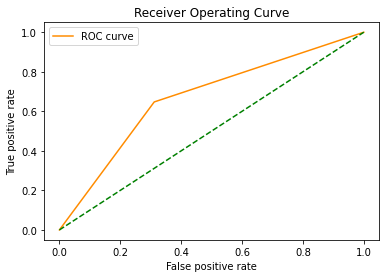

In [568]:
plt.plot(fpr,tpr,color='darkorange',label='ROC curve')
plt.plot([0,1],[0,1],color='green',linestyle='--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver Operating Curve')
plt.legend()
plt.show()

# Gradient Boosting Classifier

In [569]:
from sklearn.ensemble import GradientBoostingClassifier 

In [570]:
gbdt=GradientBoostingClassifier()

In [571]:
gbdt.fit(x_train,y_train)

GradientBoostingClassifier()

In [572]:
#passing the function
metric_score(gbdt,x_train,x_test,y_train,y_test,train=True) #for training score
metric_score(gbdt,x_train,x_test,y_train,y_test,train=False) # for testing score

-----Training score-----
Accuracy score:94.75%
-----Testing score-----
Accuracy score:76.40%
classification report 
               precision    recall  f1-score   support

           0       0.75      0.82      0.78       183
           1       0.79      0.71      0.74       173

    accuracy                           0.76       356
   macro avg       0.77      0.76      0.76       356
weighted avg       0.77      0.76      0.76       356

confusion matrix  [[150  33]
 [ 51 122]]
F1 Score  0.7439024390243902


In [573]:
#cross validation score
print('Cross Validation Score for Gradient Boosting model :- ',((cross_val_score(gbdt,princi_comp,y_new,cv=14).mean())*100))

Cross Validation Score for Gradient Boosting model :-  77.54458218931137


# Plotting ROC curve

In [574]:
pred=gbdt.predict(x_test)
fpr,tpr,threshold=roc_curve(y_test,pred)
print('fpr',fpr)
print('tpr',tpr)
print('threshold',threshold)

fpr [0.         0.18032787 1.        ]
tpr [0.         0.70520231 1.        ]
threshold [2 1 0]


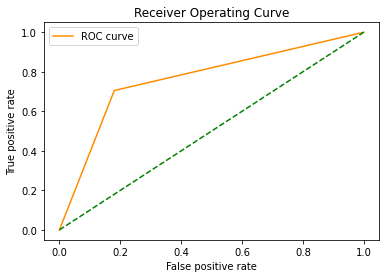

In [575]:
plt.plot(fpr,tpr,color='darkorange',label='ROC curve')
plt.plot([0,1],[0,1],color='green',linestyle='--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver Operating Curve')
plt.legend()
plt.show()

# Support Vector Classifier

In [576]:
#importing library
from sklearn.svm import SVC

In [577]:
svc=SVC()

In [578]:
svc.fit(x_train,y_train)

SVC()

In [579]:
#passing the function
metric_score(svc,x_train,x_test,y_train,y_test,train=True) #for training score
metric_score(svc,x_train,x_test,y_train,y_test,train=False) # for testing score

-----Training score-----
Accuracy score:92.50%
-----Testing score-----
Accuracy score:81.74%
classification report 
               precision    recall  f1-score   support

           0       0.81      0.84      0.83       183
           1       0.83      0.79      0.81       173

    accuracy                           0.82       356
   macro avg       0.82      0.82      0.82       356
weighted avg       0.82      0.82      0.82       356

confusion matrix  [[154  29]
 [ 36 137]]
F1 Score  0.808259587020649


In [580]:
#cross validation score
print('Cross Validation Score for SVC model :- ',((cross_val_score(svc,princi_comp,y_new,cv=14).mean())*100))

Cross Validation Score for SVC model :-  79.86729345203429


# Plotting ROC curve

In [581]:
pred=svc.predict(x_test)
fpr,tpr,threshold=roc_curve(y_test,pred)
print('fpr',fpr)
print('tpr',tpr)
print('threshold',threshold)

fpr [0.         0.15846995 1.        ]
tpr [0.         0.79190751 1.        ]
threshold [2 1 0]


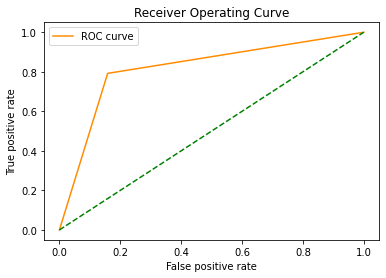

In [582]:
plt.plot(fpr,tpr,color='darkorange',label='ROC curve')
plt.plot([0,1],[0,1],color='green',linestyle='--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver Operating Curve')
plt.legend()
plt.show()

# Dataframe showing training, testing, F1 score and Cross validation scores with respect to different models

In [585]:
column=pd.DataFrame({'Model':['Logistic Regression','Random Forests','Decision Trees','Gradient Boosted Tees','Support vector classifier'],
                    'Training scores':[75.26,100,100,94.75,92.50],
                    'Testing scores':[74.16,78.93,66.85,76.40,81.74],
                    'Cross validation score':[73.94,79.30,67.90,77.54,79.86],
                    'F1 score':[73.56,76.92,65.49,74.39,80.82]})
column

,Model,Training scores,Testing scores,Cross validation score,F1 score
0,Logistic Regression,75.26,74.16,73.94,73.56
1,Random Forests,100.00,78.93,79.30,76.92
2,Decision Trees,100.00,66.85,67.90,65.49
3,Gradient Boosted Tees,94.75,76.40,77.54,74.39
4,Support vector classifier,92.50,81.74,79.86,80.82


- Logistic regression is giving good training and testing score but it is low compared to random forest and support vector classifier.
-**Incase of Random forests the training score is best possible but training score is less compared to Support vector classifier; The cross validations and F1 scores also suggests to pick SVC as the best model for hyperparameter tuning.**

# Hyperparameter tuning for Support Vector Classifier model

In [586]:
#importing GridSearchCV library
from sklearn.model_selection import GridSearchCV

In [591]:
#setting parameters for tuning
grid_param=[{'C':range(2,10),
           'gamma':[0.001,0.01,0.02,0.002],
            'kernel':['linear','poly','rbf','sigmoid'],
            'degree':[3,4,5,6,7],
            'verbose':[True,False]}]

In [596]:
grid=GridSearchCV(svc,param_grid=grid_param)

In [593]:
grid.fit(x_train,y_train)

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

GridSearchCV(estimator=SVC(),
             param_grid=[{'C': range(2, 10), 'degree': [3, 4, 5, 6, 7],
                          'gamma': [0.001, 0.01, 0.02, 0.002],
                          'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                          'verbose': [True, False]}])

In [595]:
#best parameters for tuning
grid.best_params_

{'C': 7, 'degree': 3, 'gamma': 0.02, 'kernel': 'rbf', 'verbose': True}

In [598]:
#using best parameters to train

svc1=SVC(C=7,degree=3,gamma=0.02,kernel='rbf',verbose=True)

In [599]:
svc1.fit(x_train,y_train)

[LibSVM]

SVC(C=7, gamma=0.02, verbose=True)

In [600]:
#passing the function
metric_score(svc1,x_train,x_test,y_train,y_test,train=True) #for training score
metric_score(svc1,x_train,x_test,y_train,y_test,train=False) # for testing score

-----Training score-----
Accuracy score:99.25%
-----Testing score-----
Accuracy score:80.06%
classification report 
               precision    recall  f1-score   support

           0       0.82      0.78      0.80       183
           1       0.78      0.82      0.80       173

    accuracy                           0.80       356
   macro avg       0.80      0.80      0.80       356
weighted avg       0.80      0.80      0.80       356

confusion matrix  [[143  40]
 [ 31 142]]
F1 Score  0.8


In [604]:
#cross validation score
print(' \n Cross Validation Score for SVC model :- ',((cross_val_score(svc1,princi_comp,y_new,cv=14).mean())*100))

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM] 
 Cross Validation Score for SVC model :-  81.4703108966359


# Plotting ROC curve

In [602]:
pred=svc1.predict(x_test)
fpr,tpr,threshold=roc_curve(y_test,pred)
print('fpr',fpr)
print('tpr',tpr)
print('threshold',threshold)

fpr [0.         0.21857923 1.        ]
tpr [0.         0.82080925 1.        ]
threshold [2 1 0]


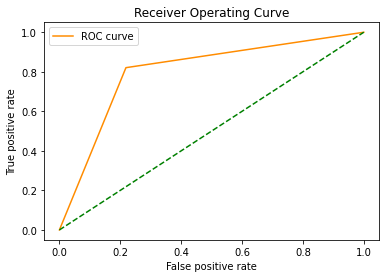

In [603]:
plt.plot(fpr,tpr,color='darkorange',label='ROC curve')
plt.plot([0,1],[0,1],color='green',linestyle='--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver Operating Curve')
plt.legend()
plt.show()

**The tuned model has high training but low testing accuracy then the original model, hence the original svc model will be saved.**

# Saving the model using pickle

In [605]:
import pickle 

In [606]:
pickle.dump(svc1,open('fraud_insurance_svc','wb'))